In [1]:
#### 1.loading_data.R 
### 1)Read cluster resaults
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
hclust.Res <- Cluster.20200201.V7.Tumor$hclust.Res

### 5)COAD_The_Immune_Landscape_of_Cancer_Immune_Characteristics
##The_Immune_Landscape_of_Cancer
file5 <- "/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/The_Immune_Landscape_of_Cancer/COAD_The_Immune_Landscape_of_Cancer_Immune_Characteristics.rds"
COAD_Immune_Characteristics <- readRDS(file5)



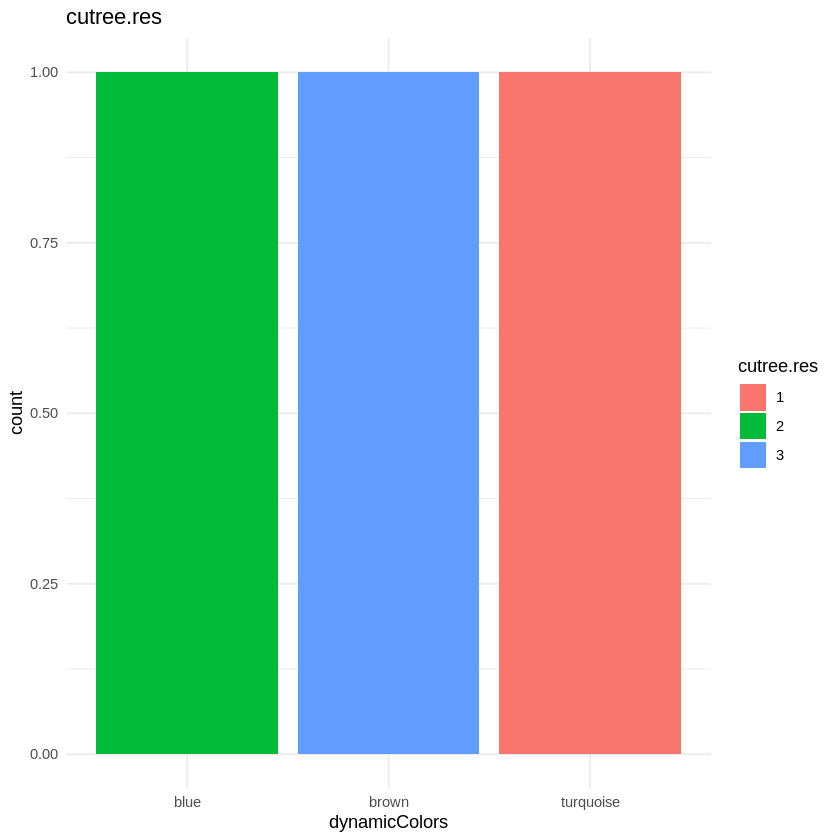

[1] "Some thing wrong with---rownames"
[1] "Some thing wrong with---barcode"


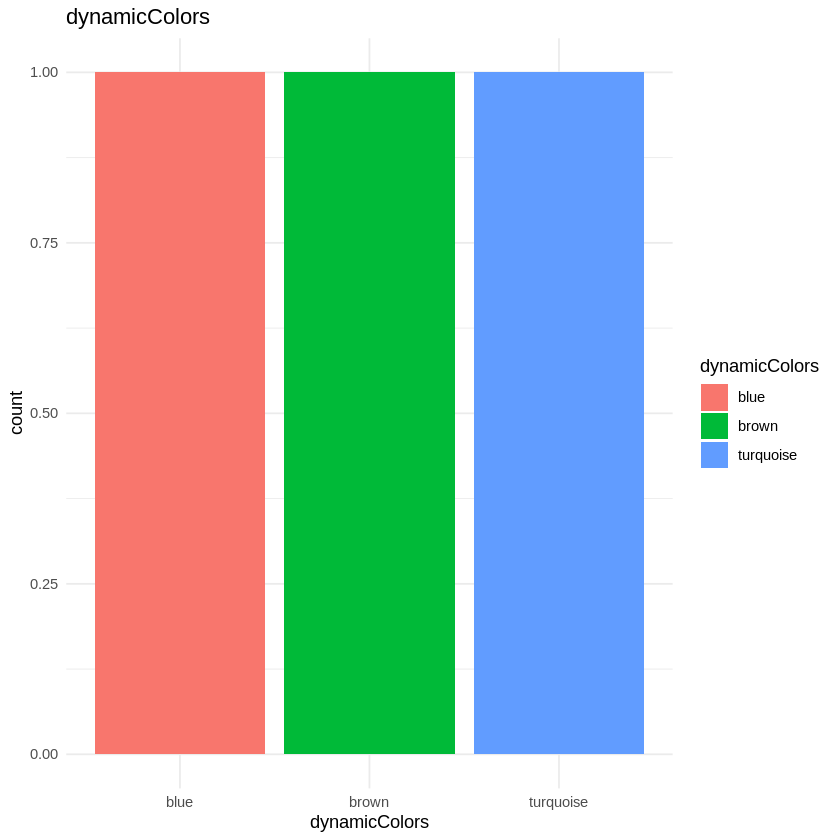

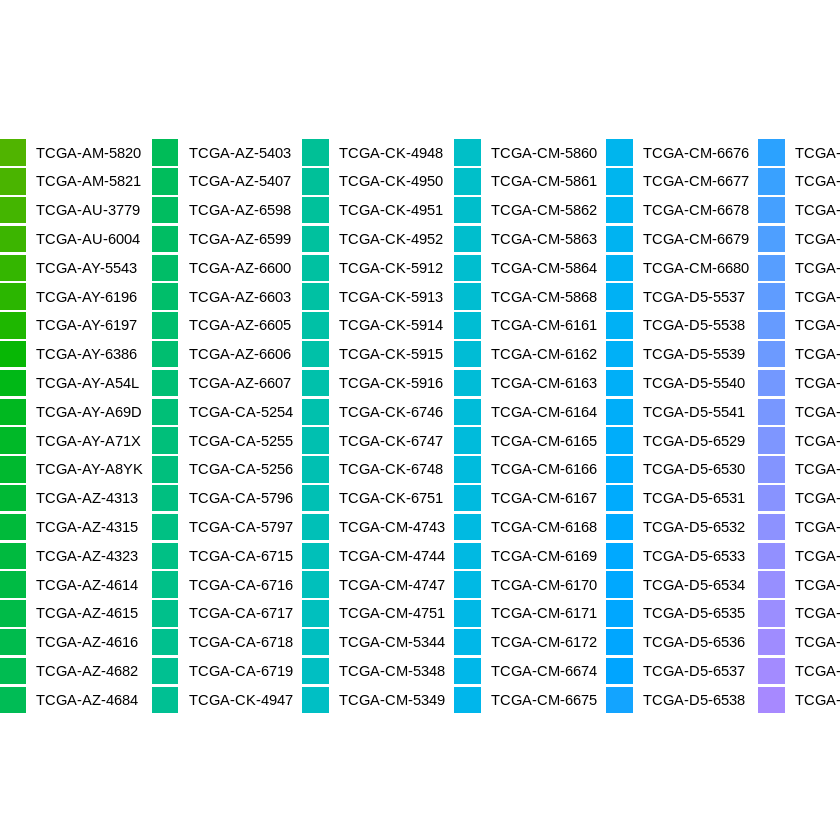

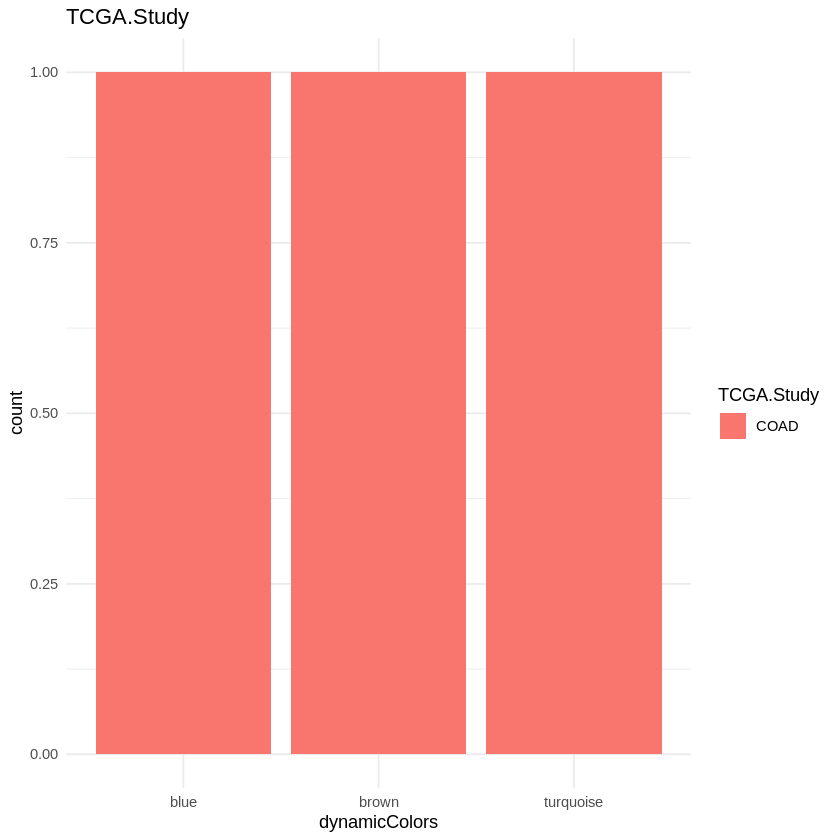

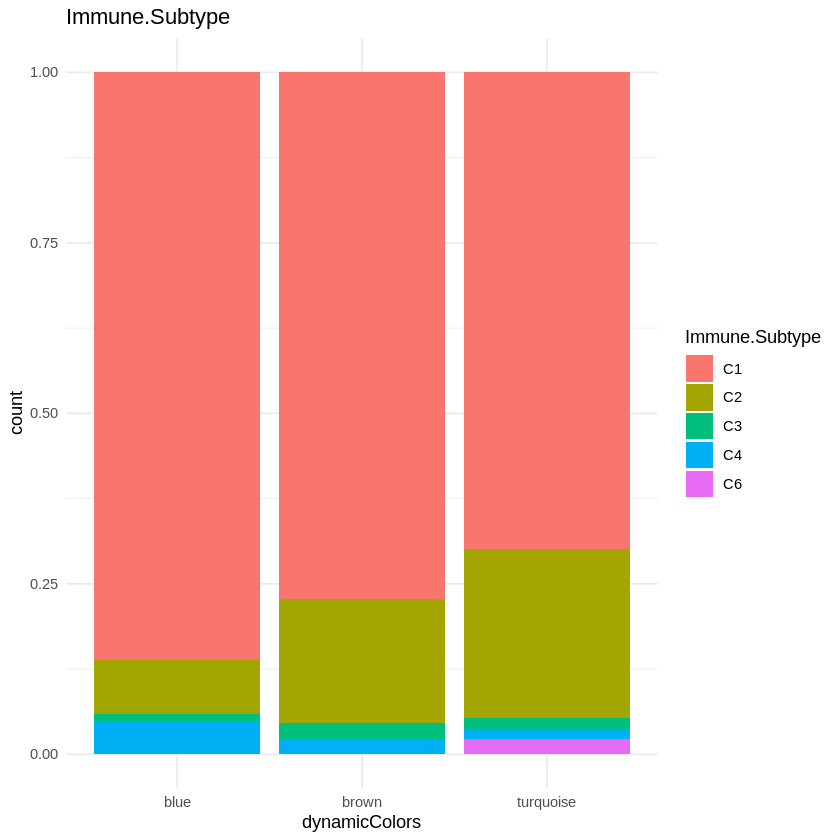

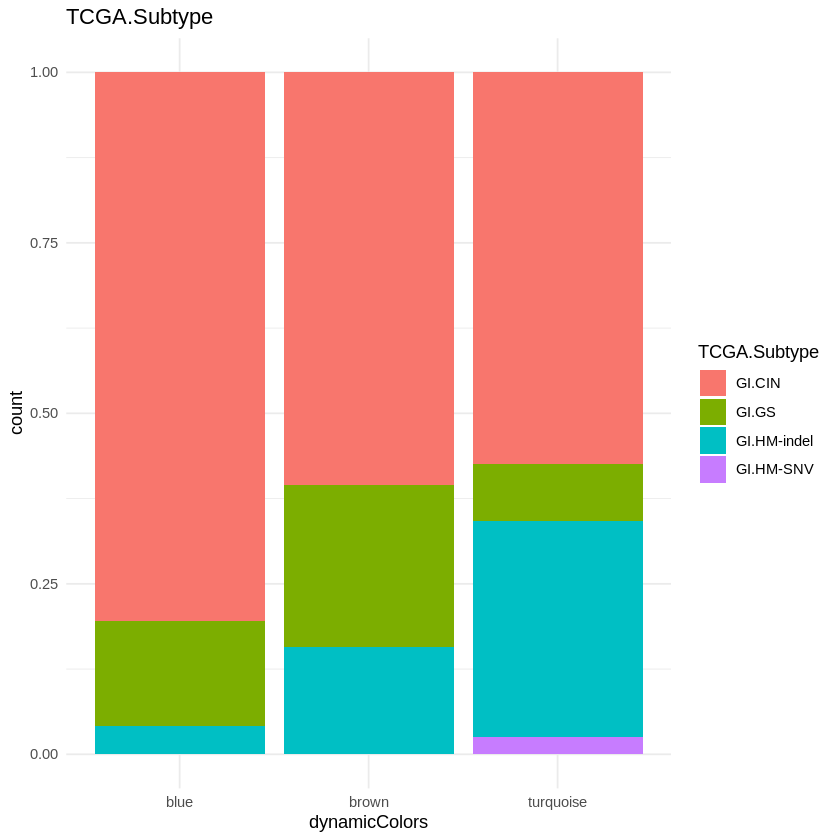

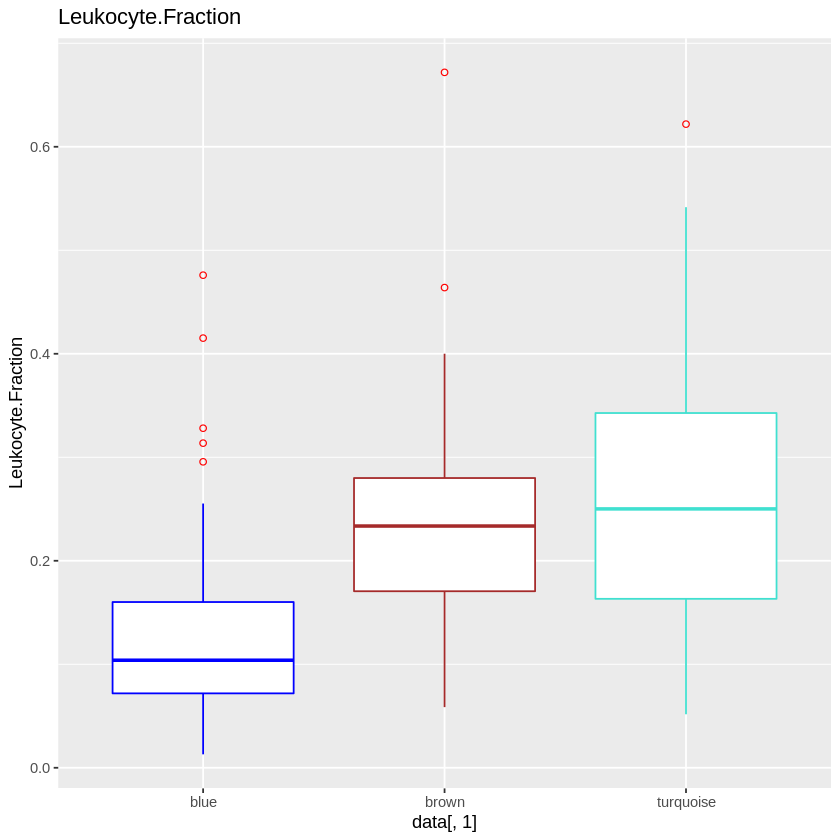

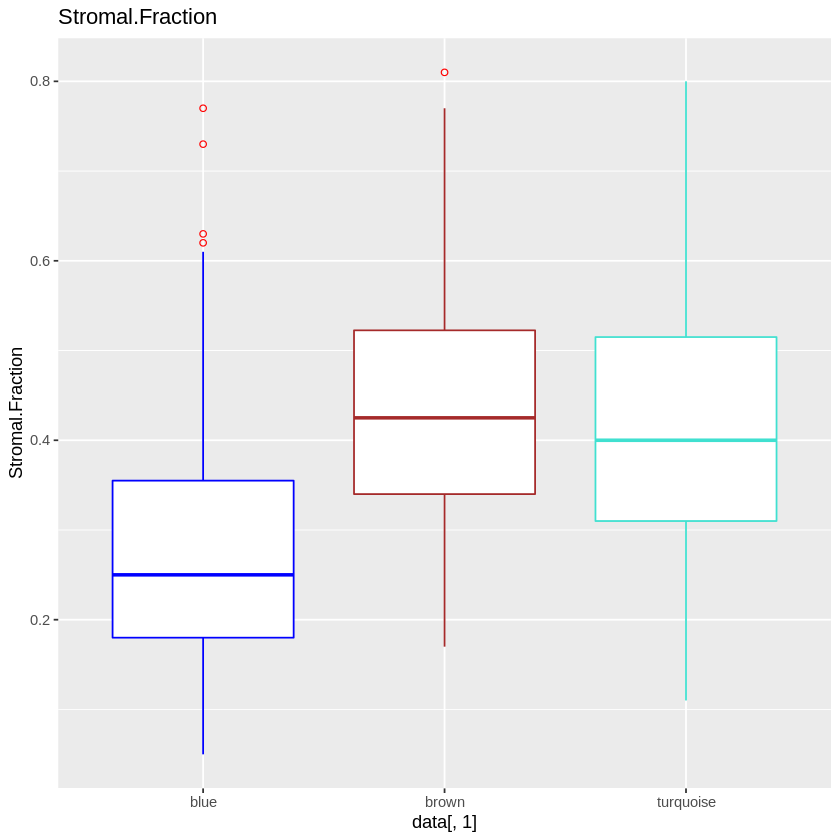

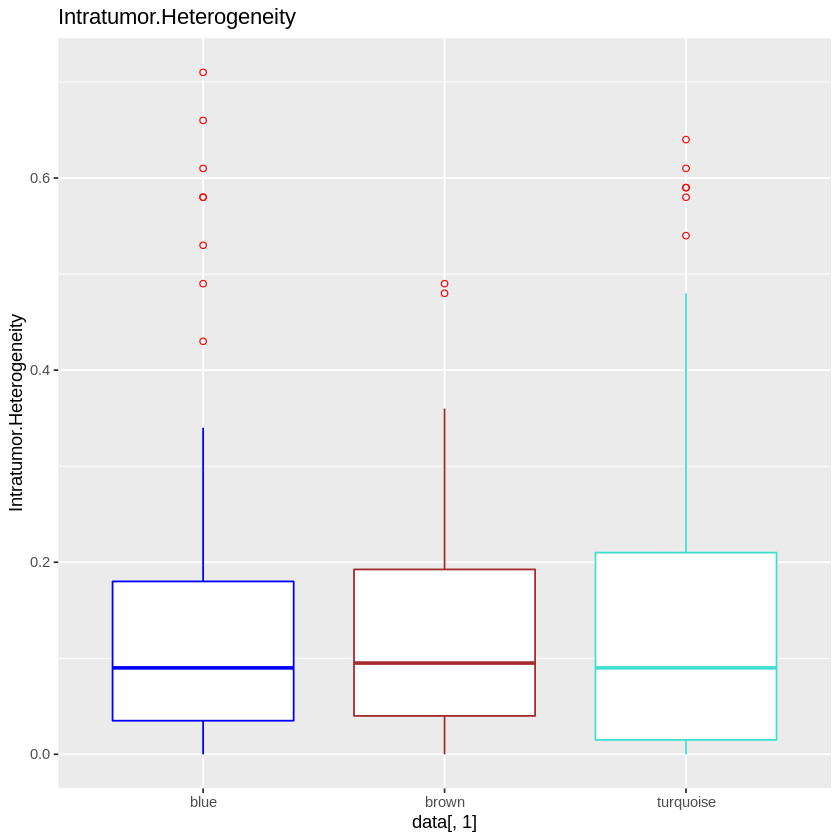

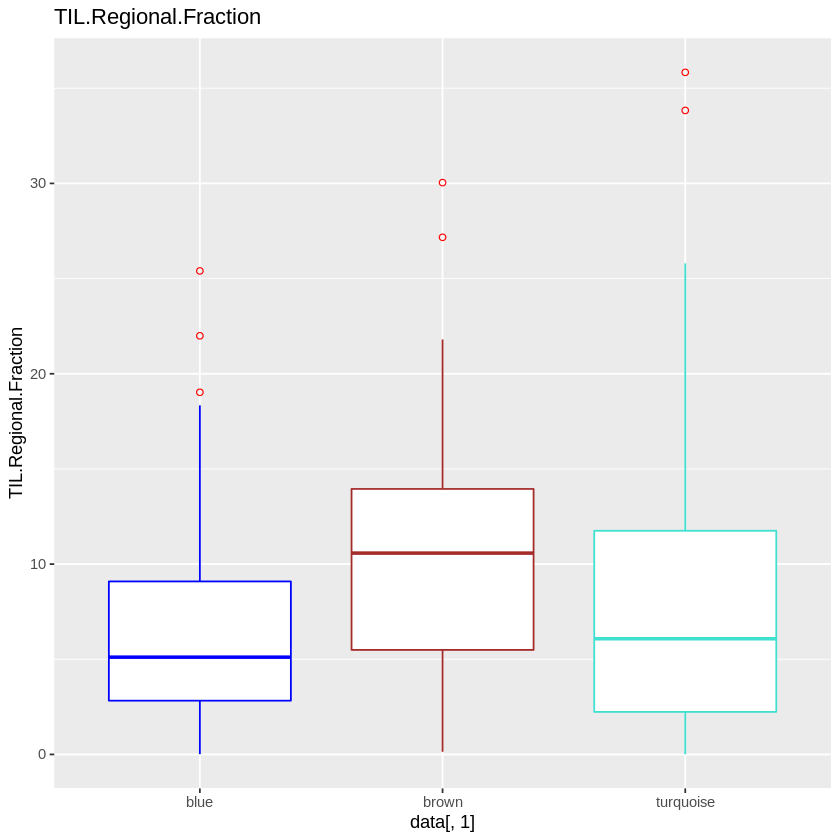

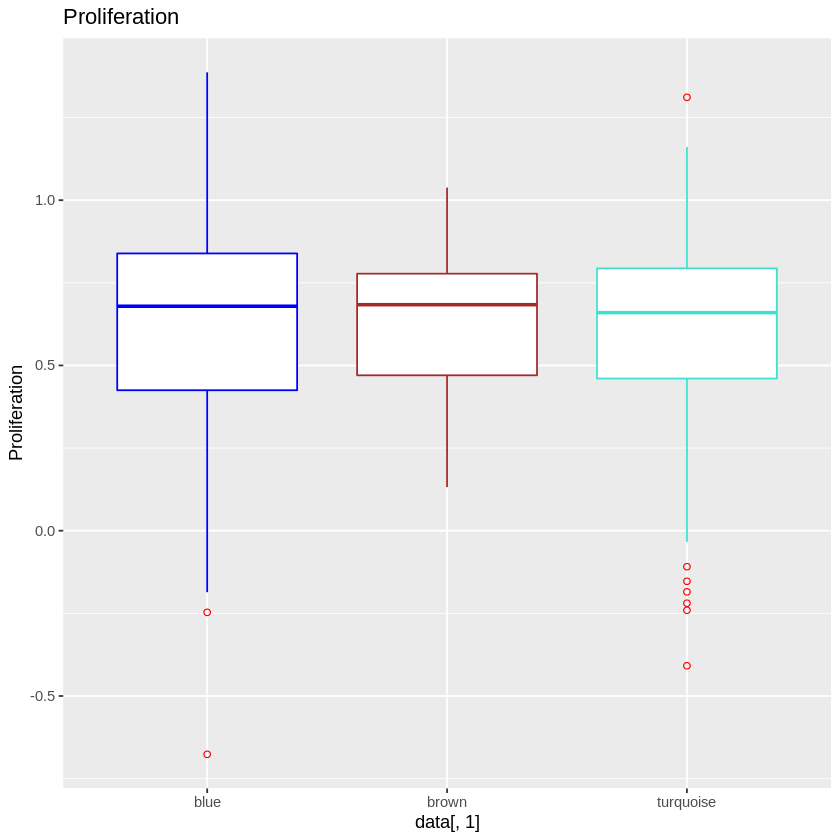

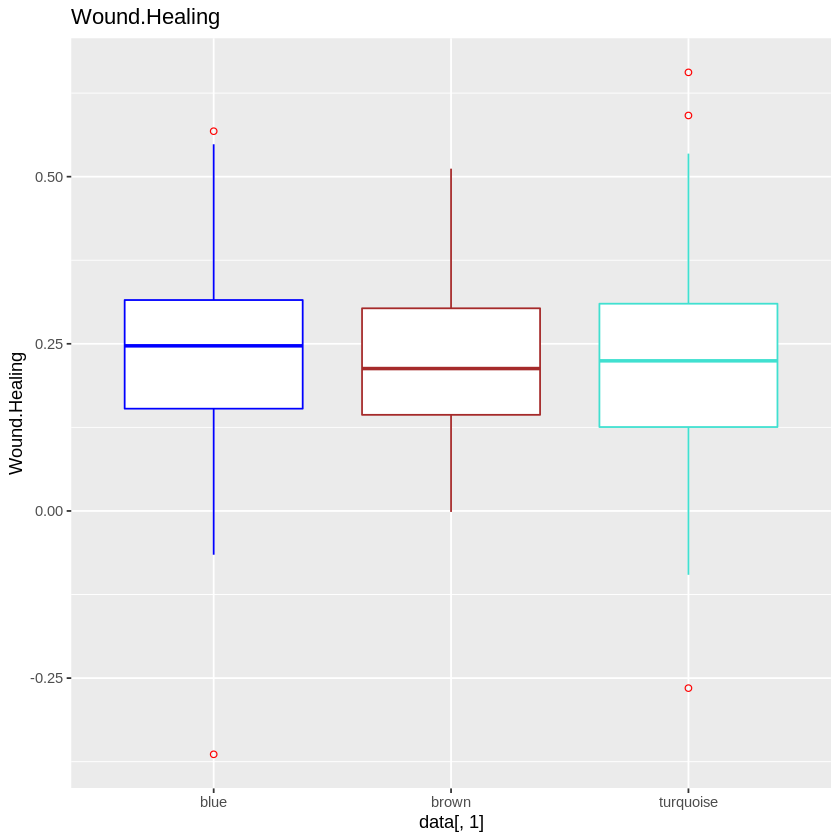

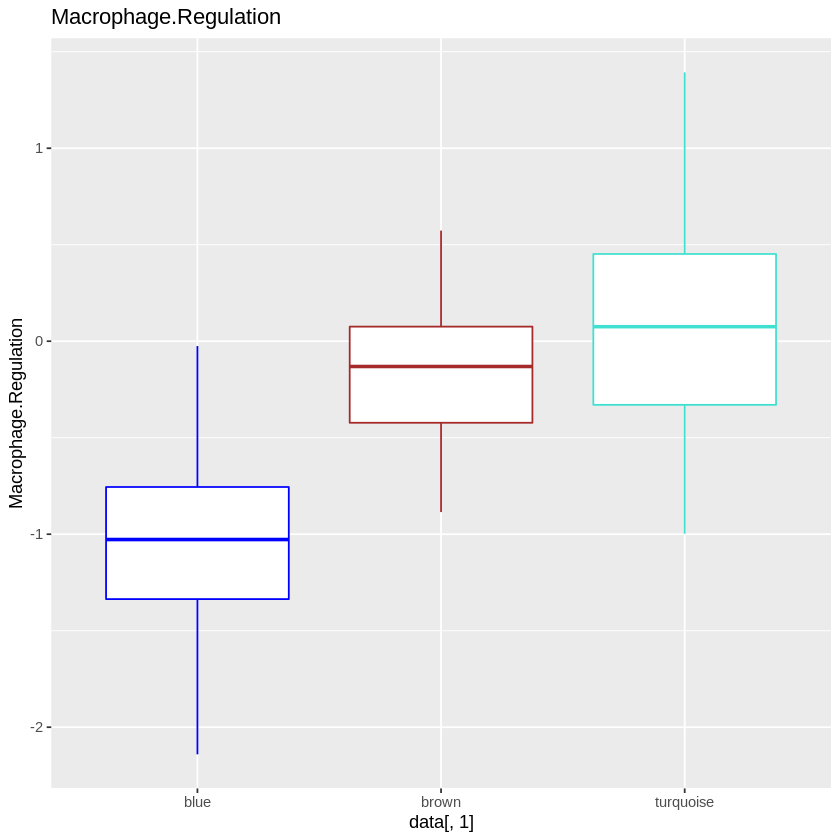

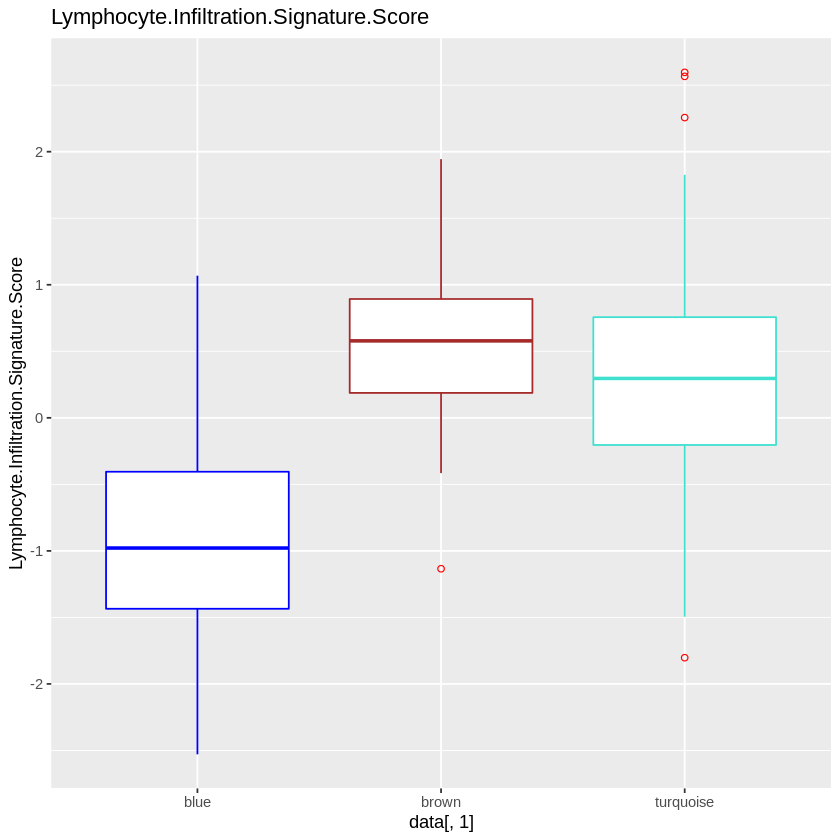

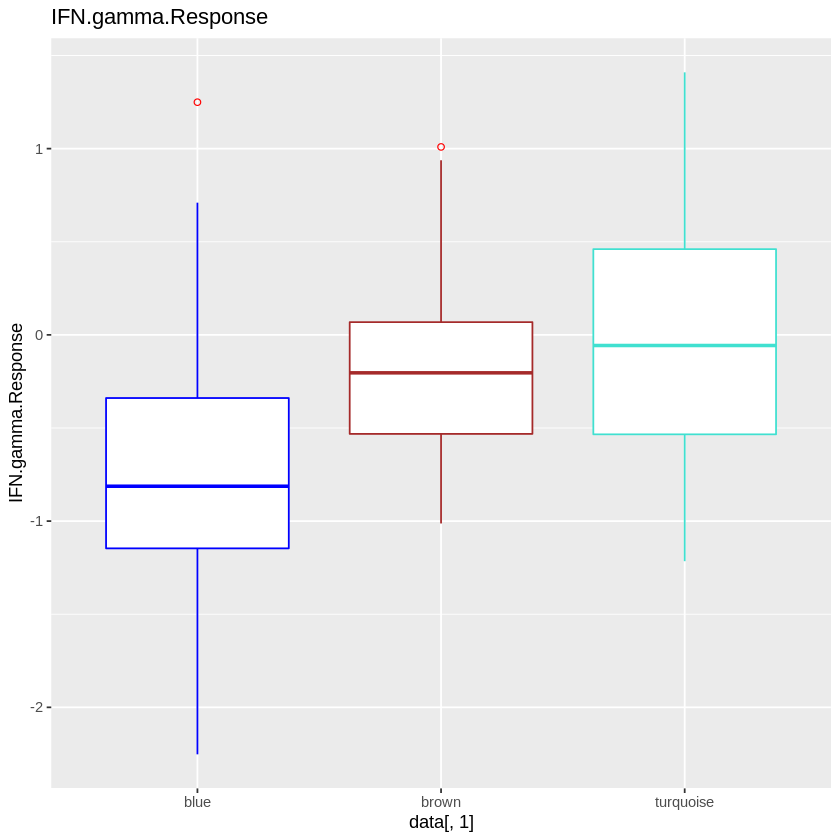

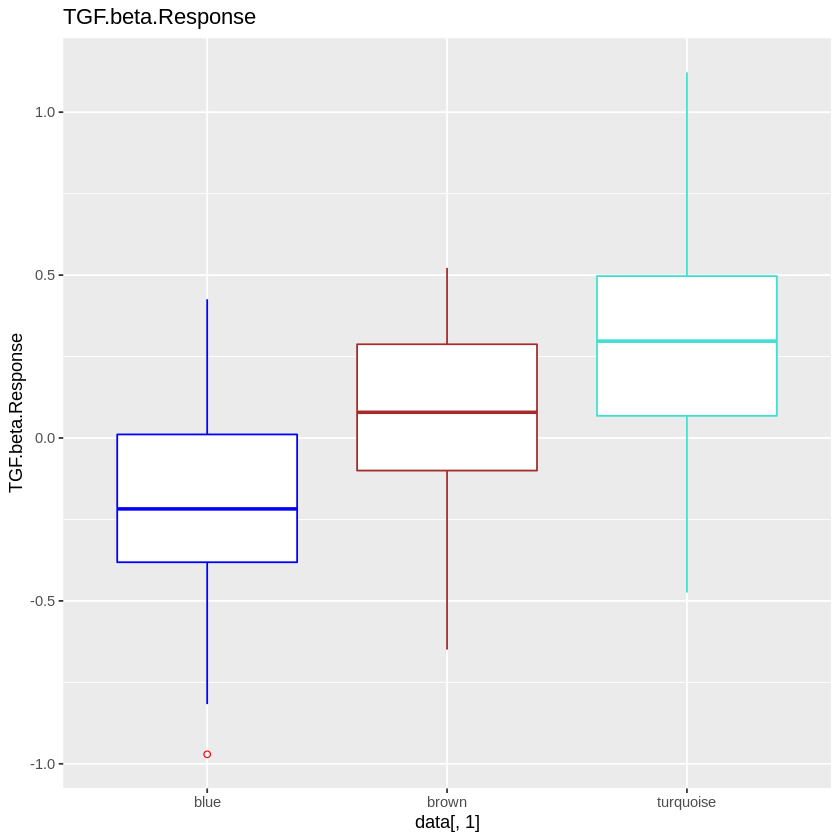

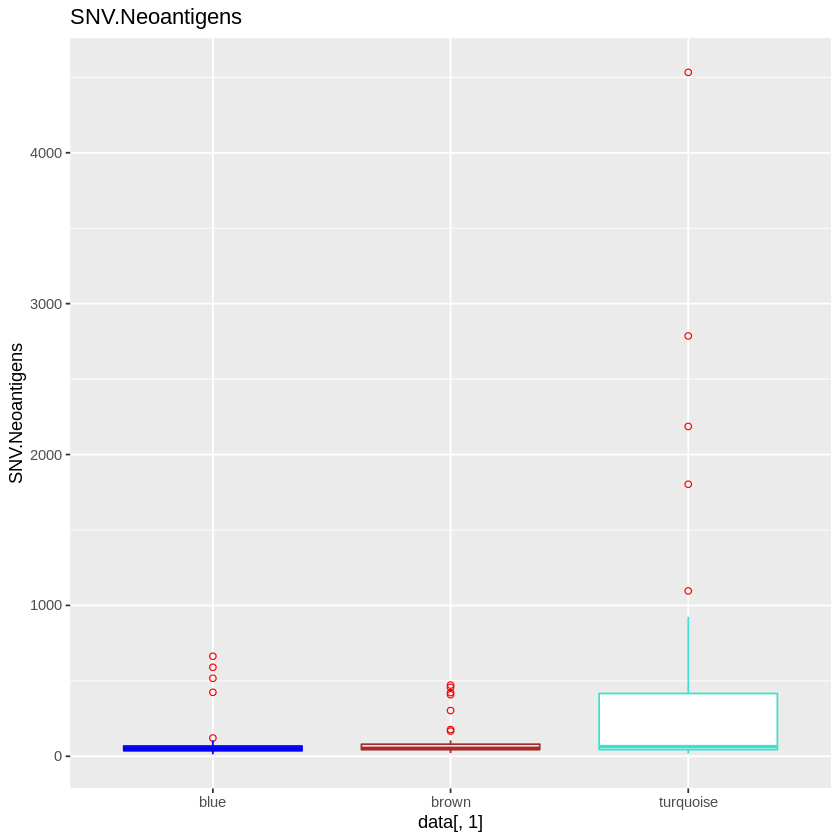

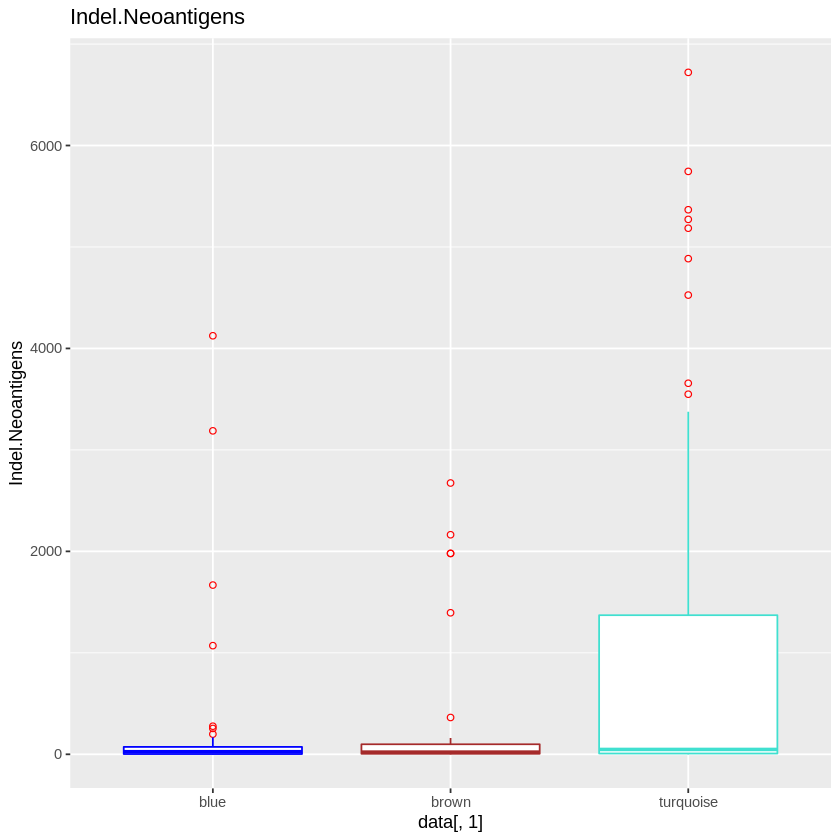

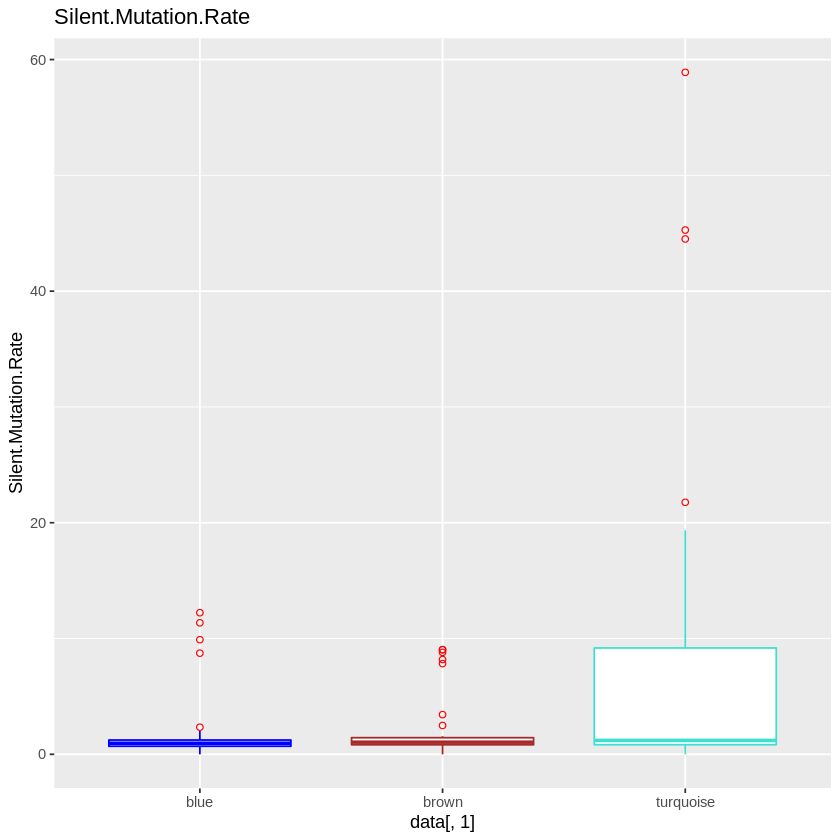

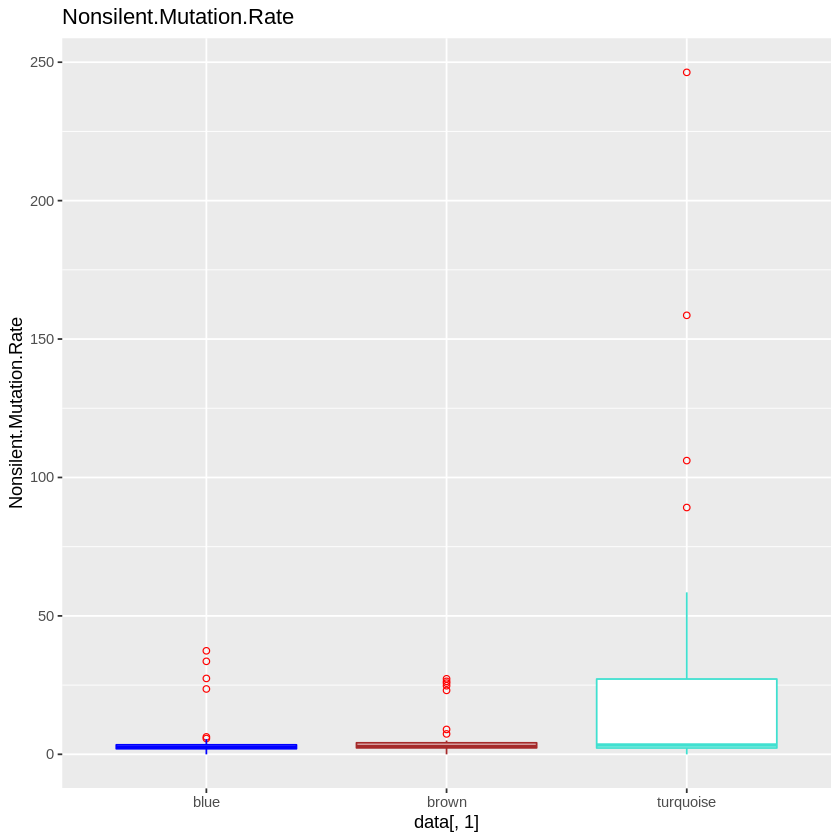

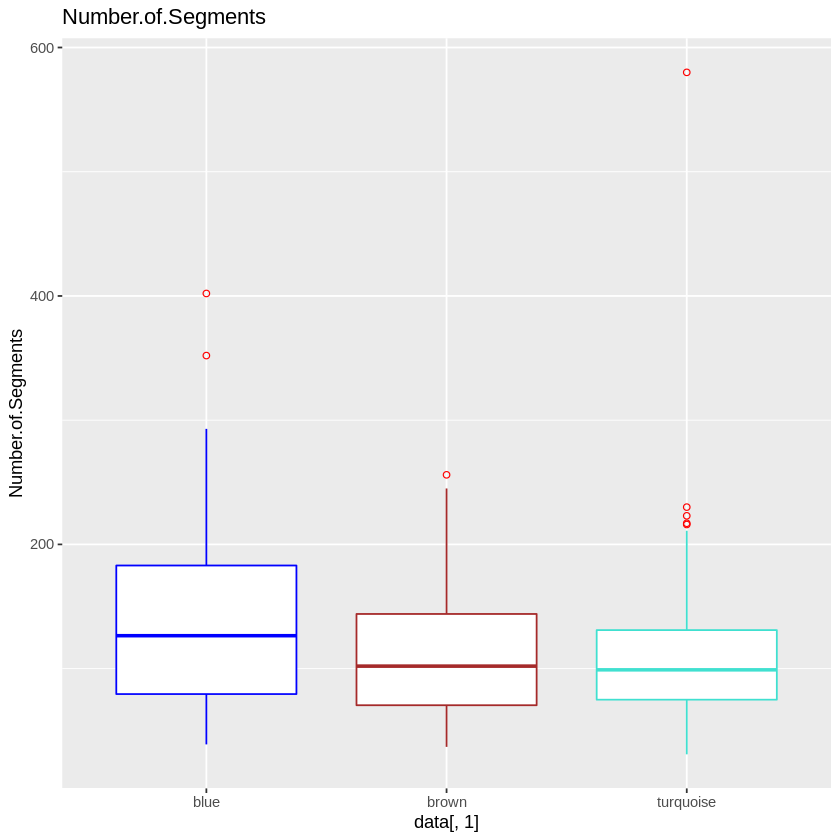

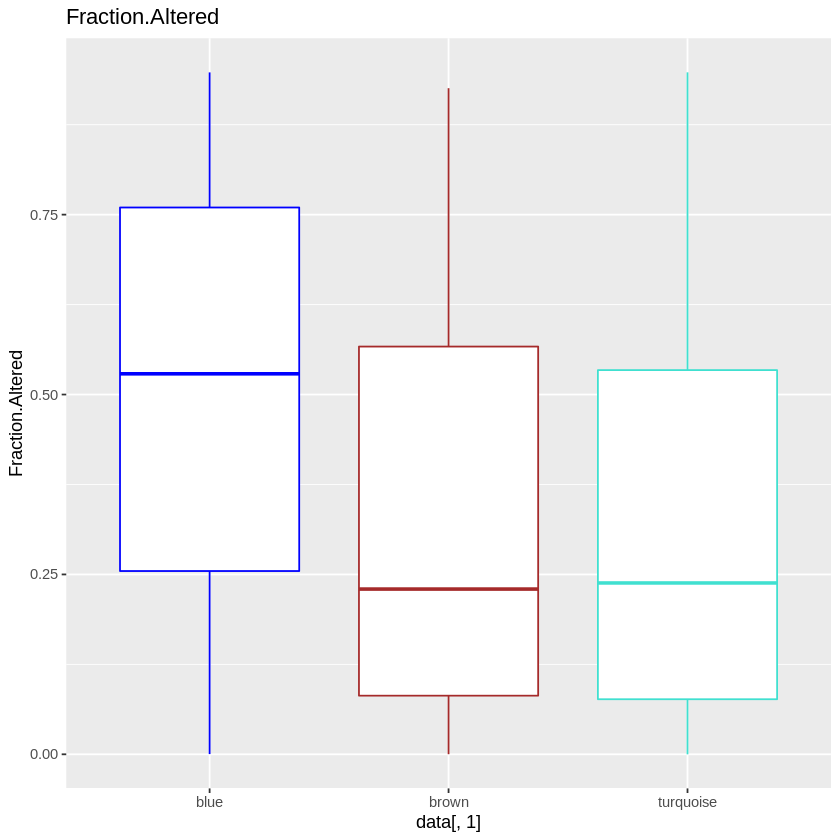

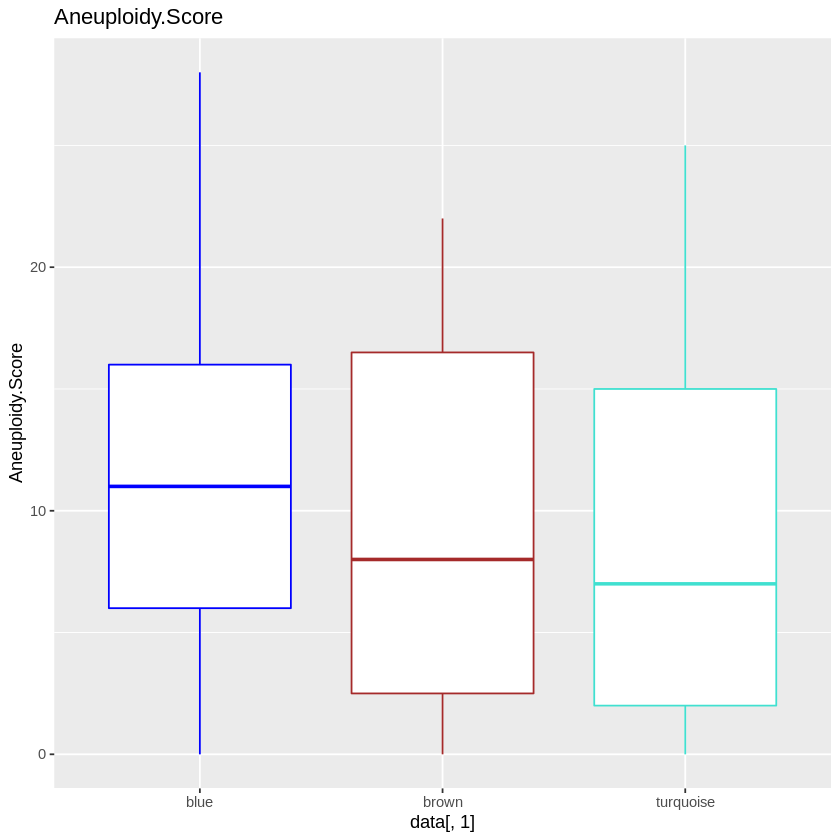

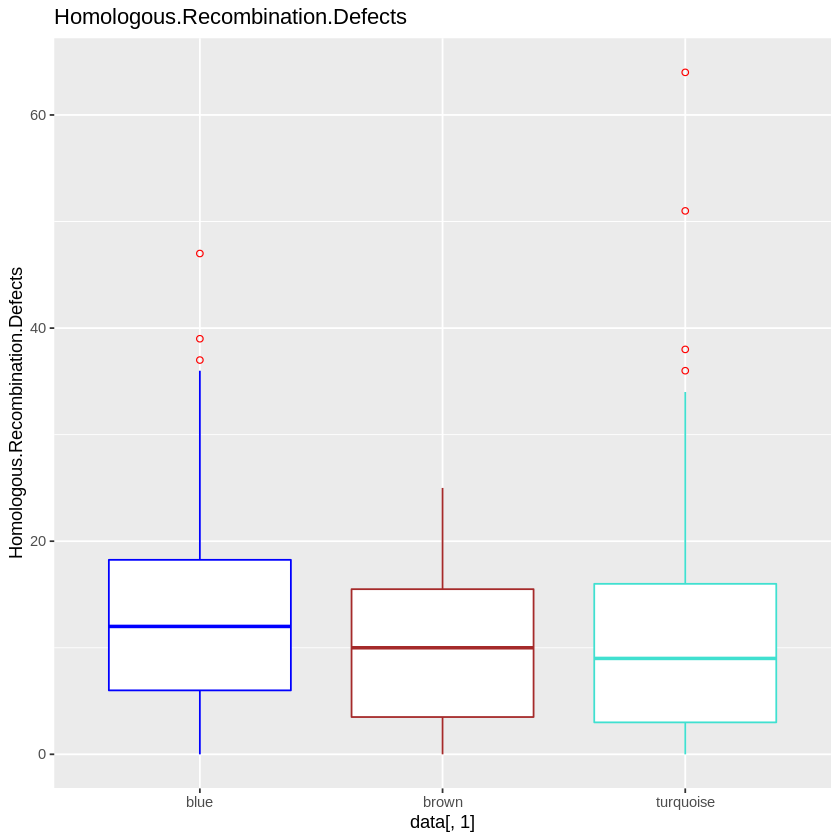

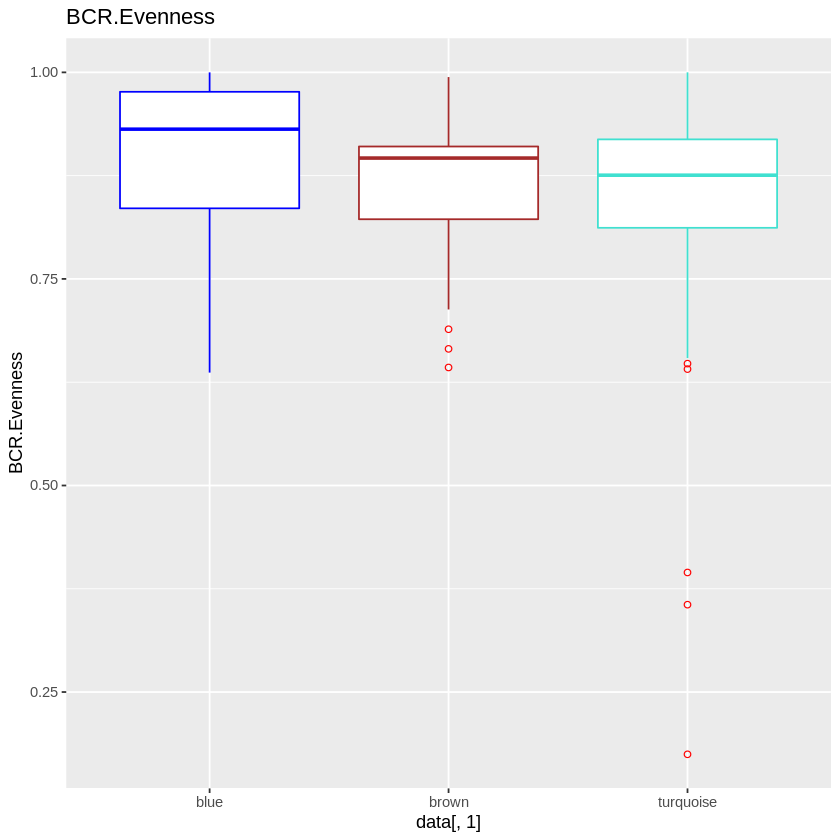

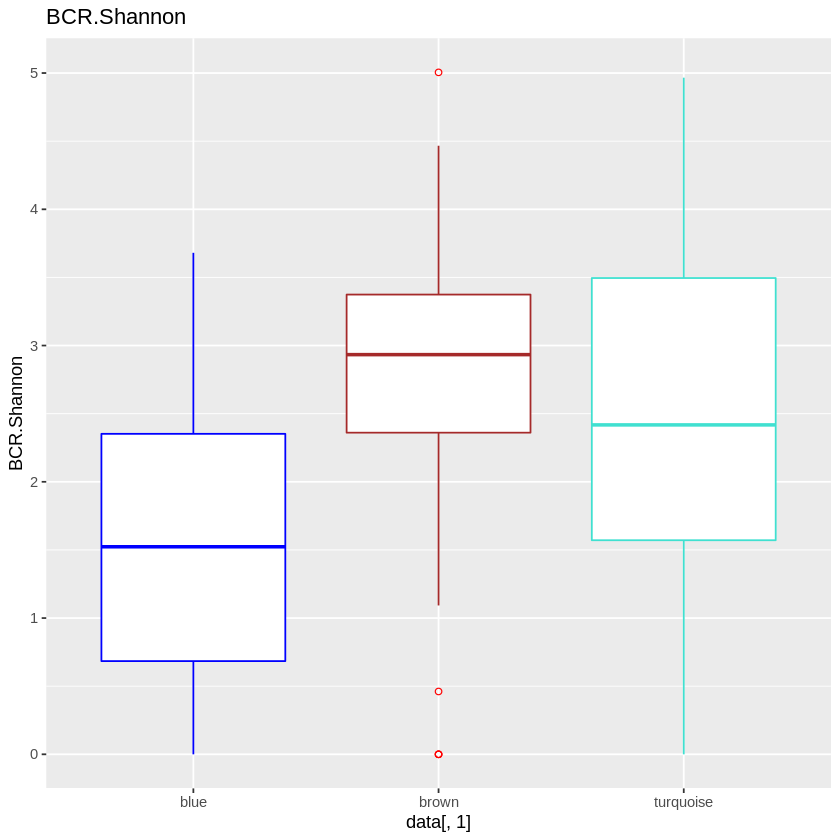

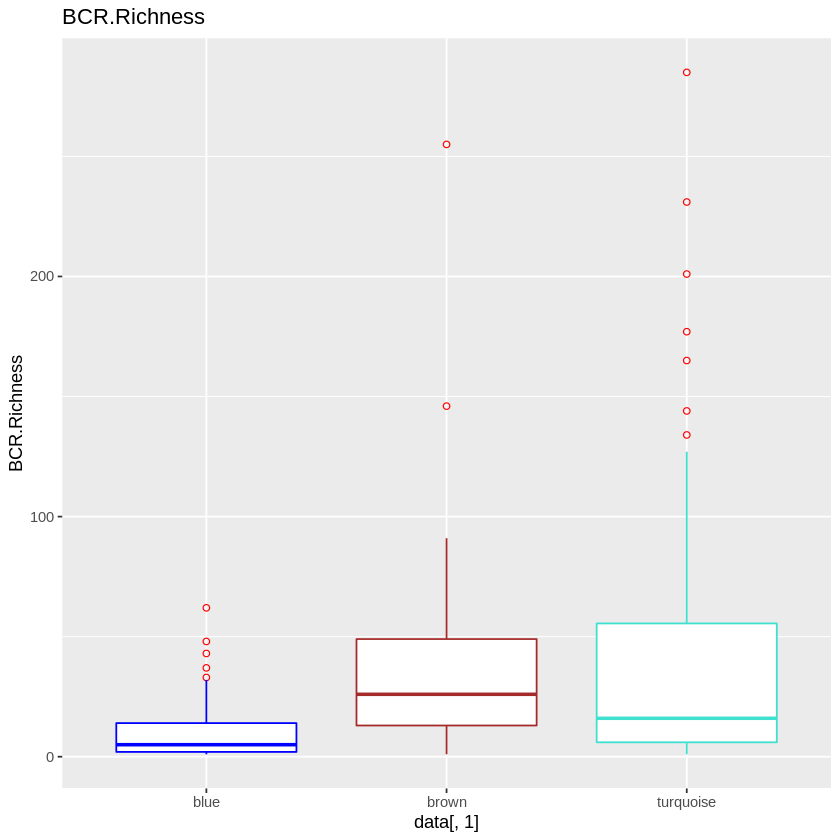

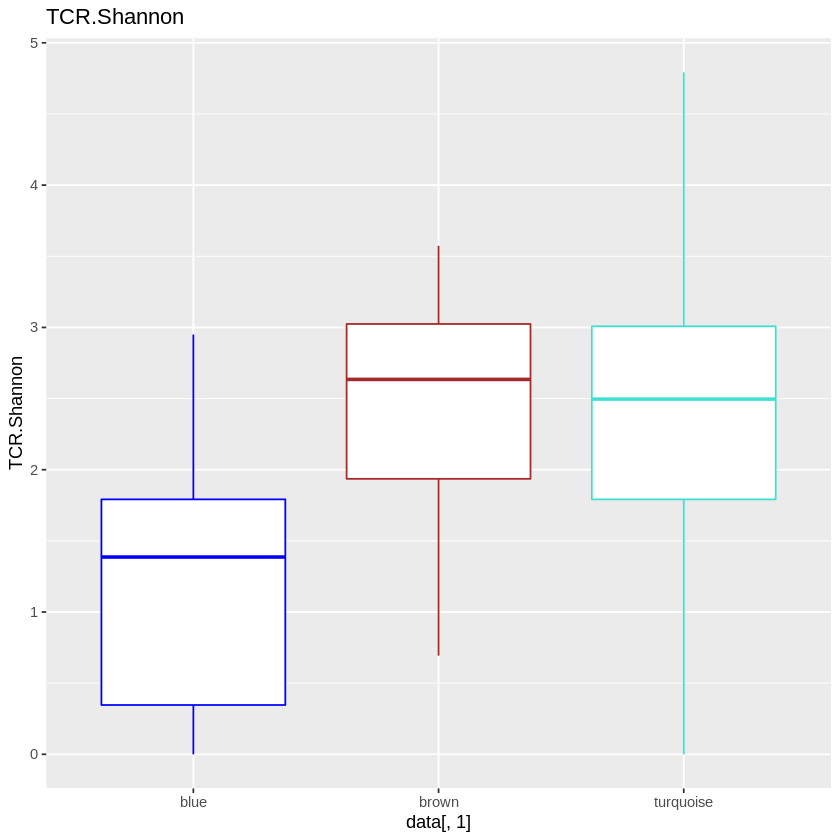

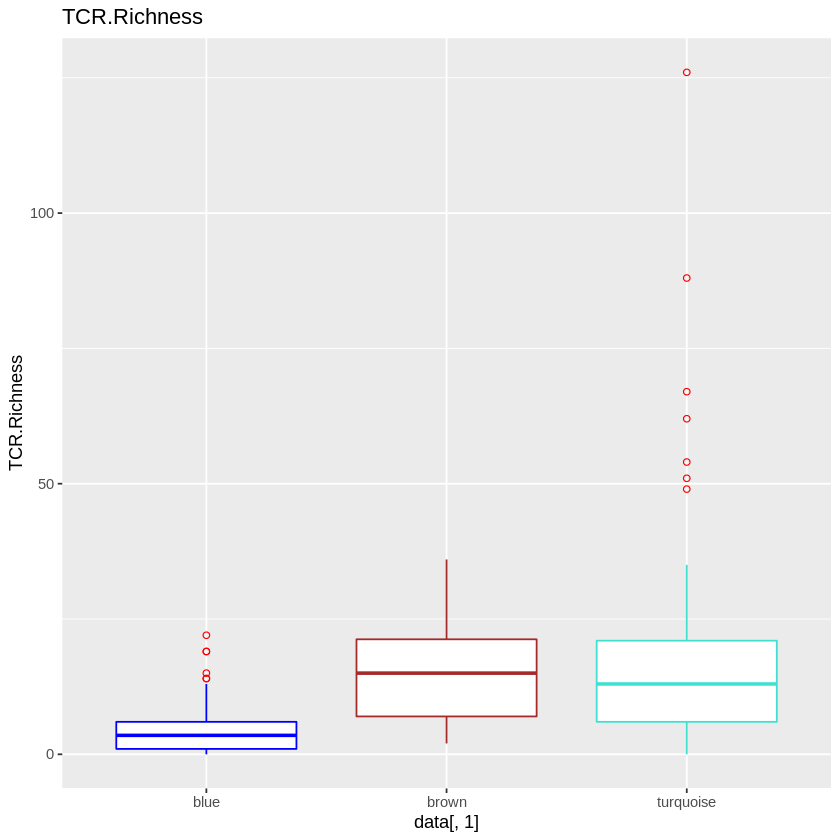

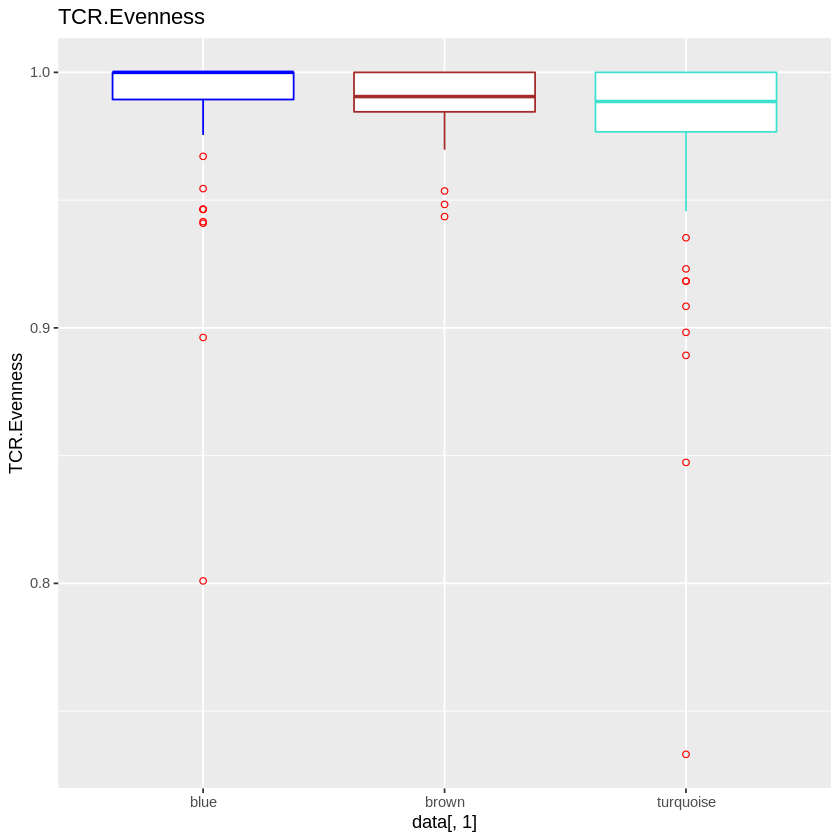

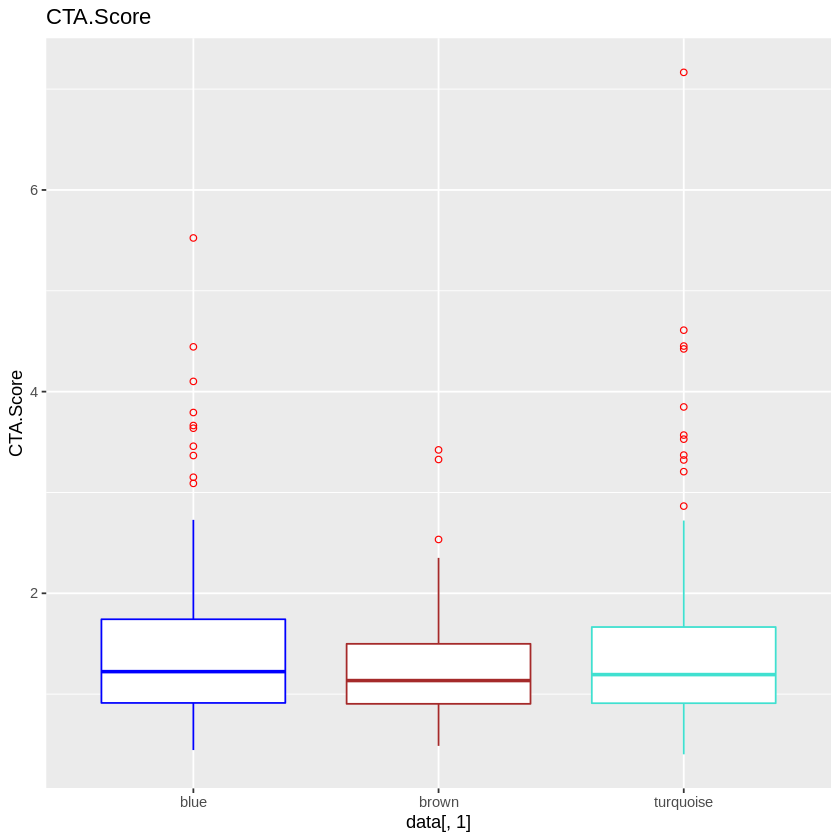

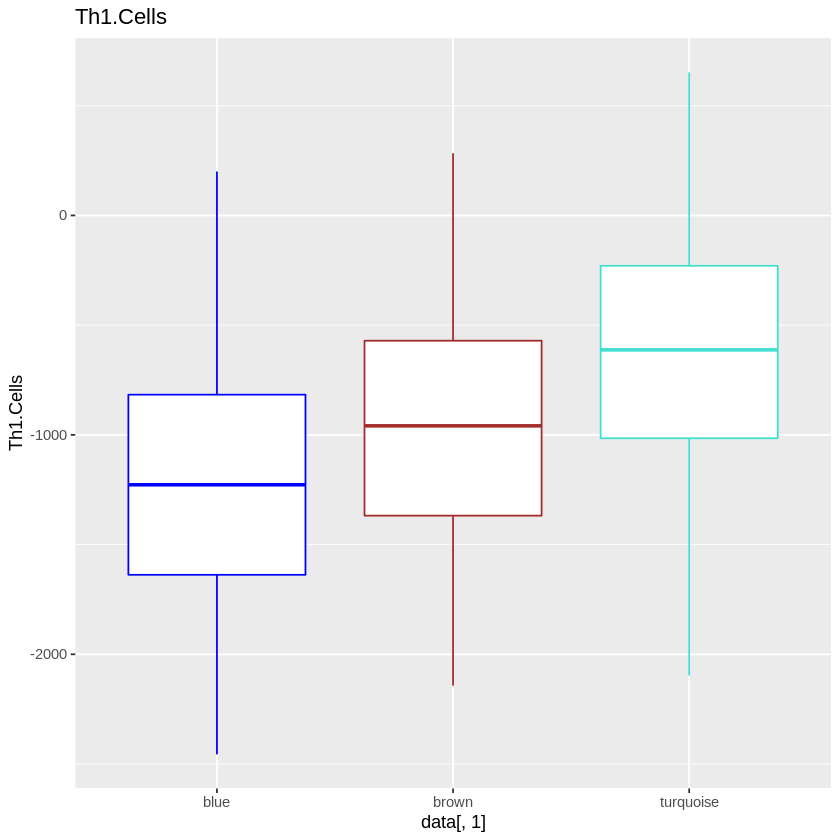

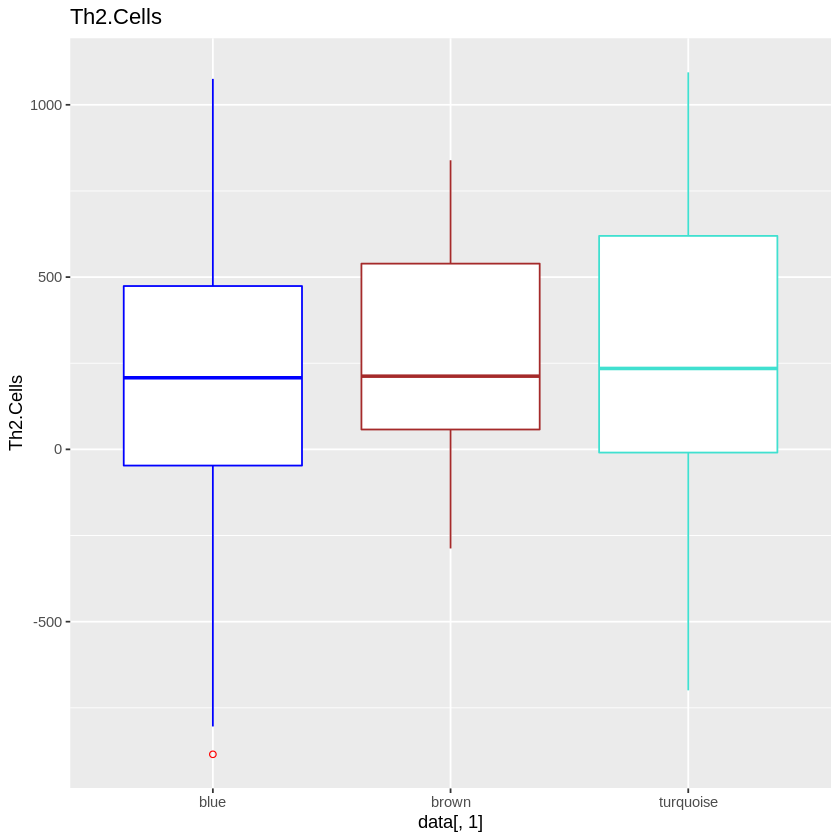

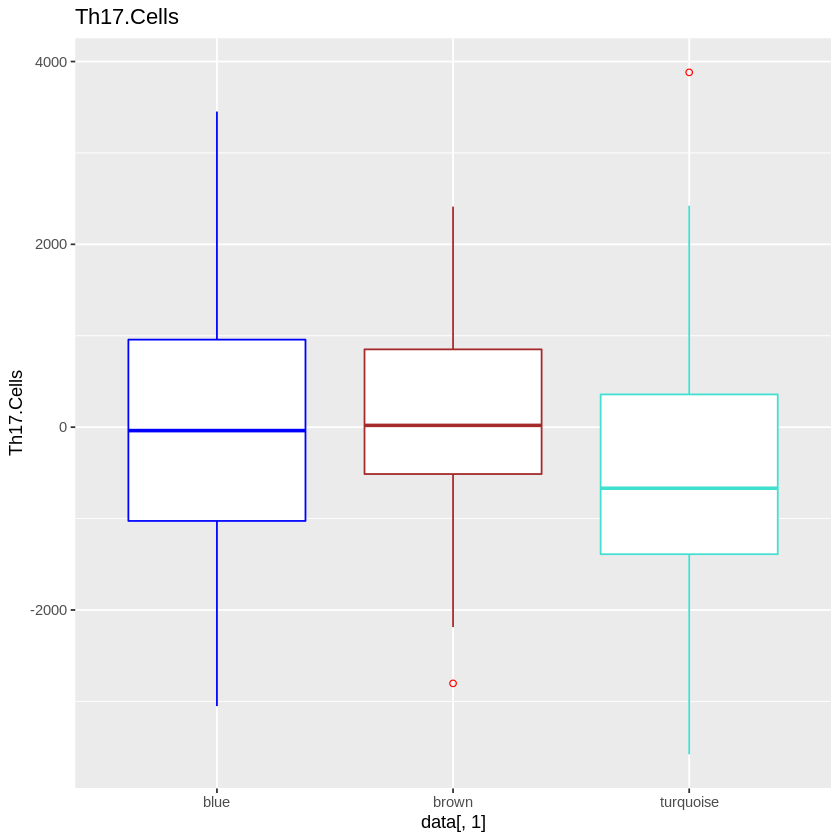

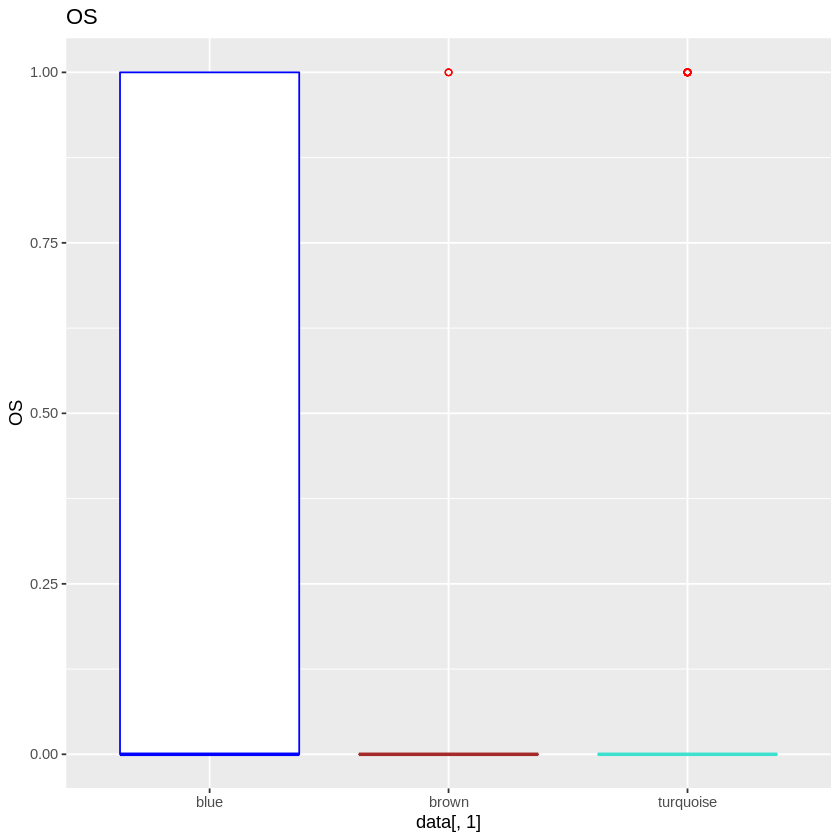

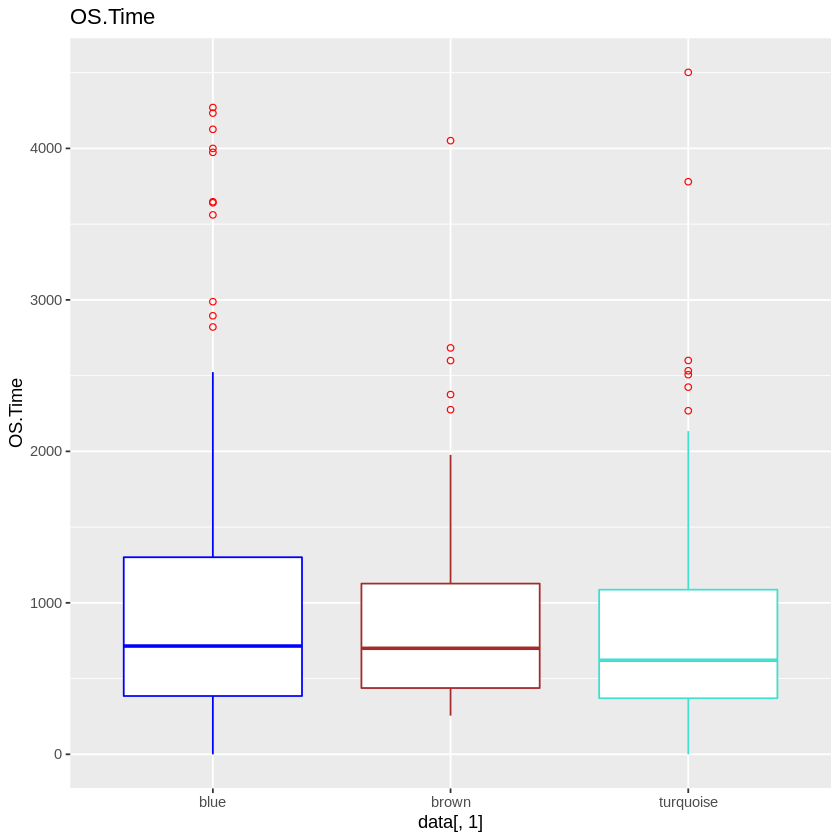

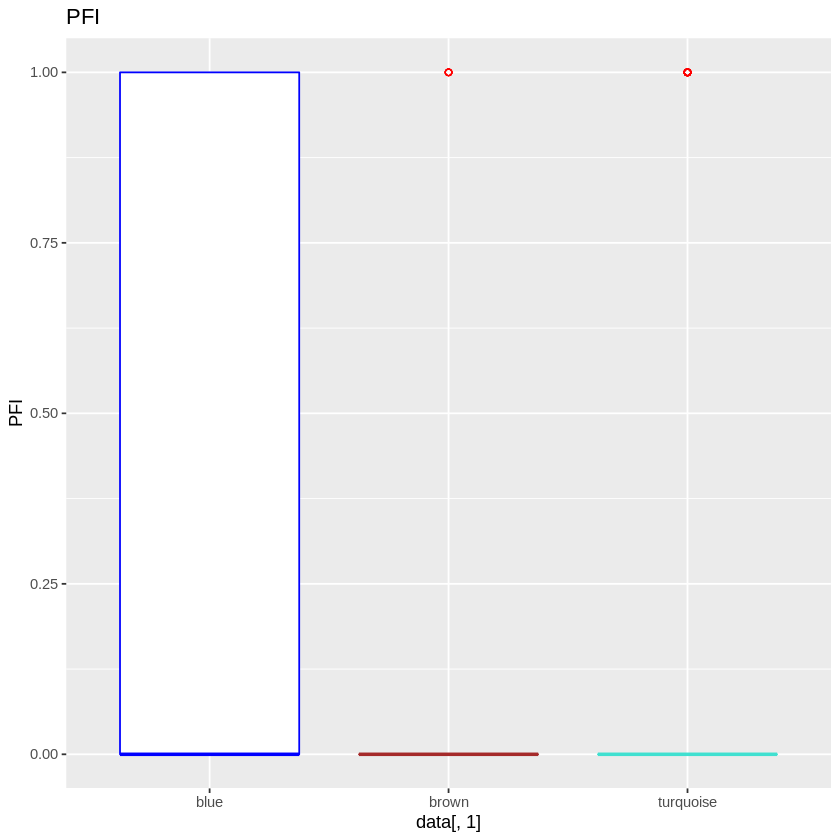

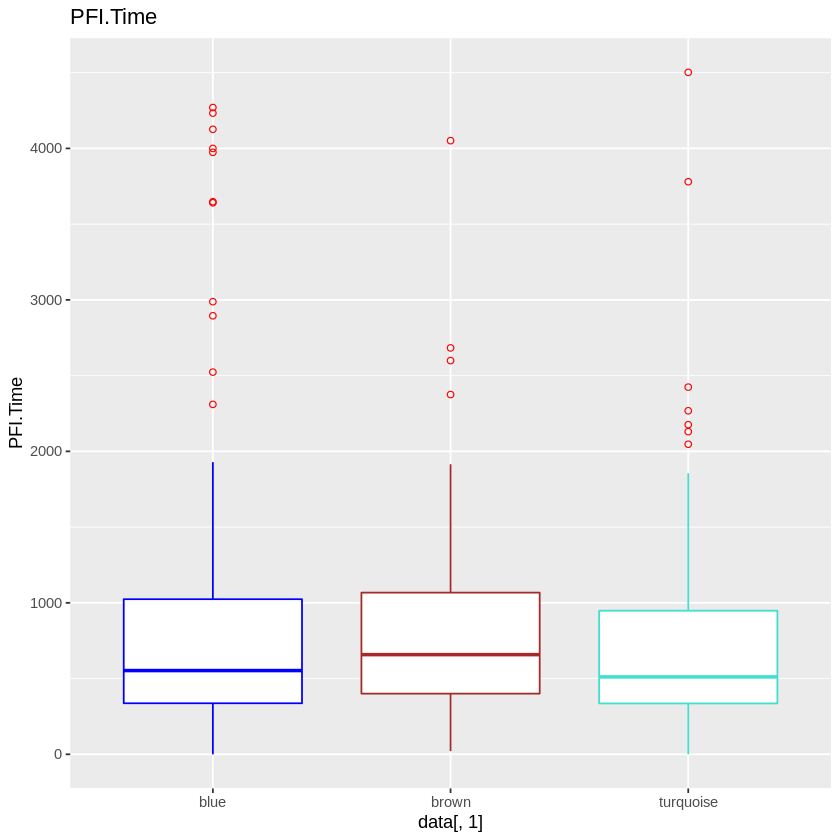

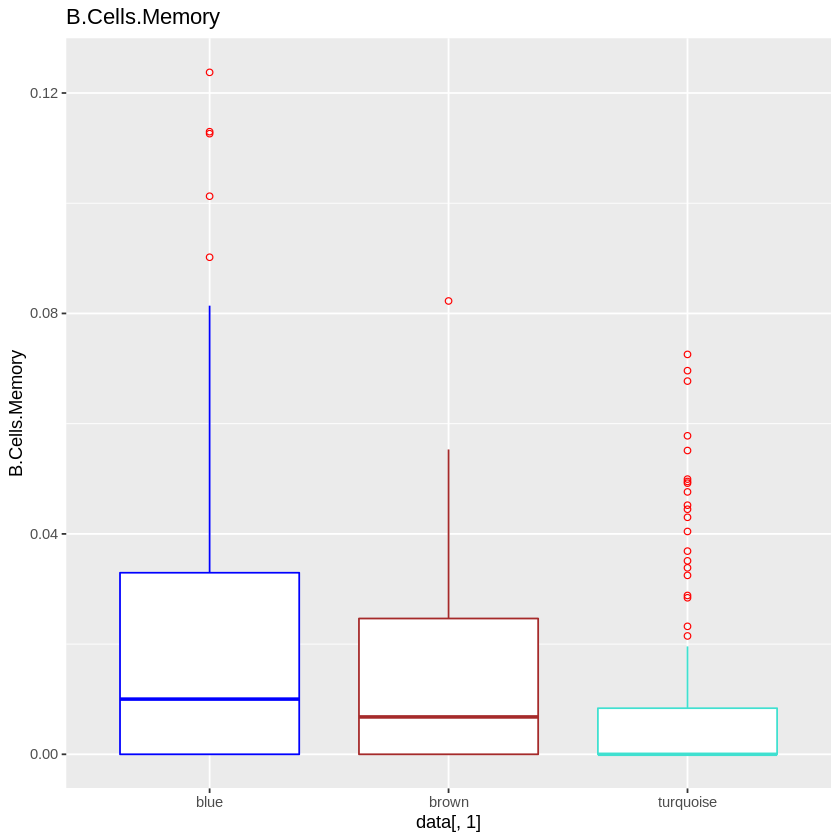

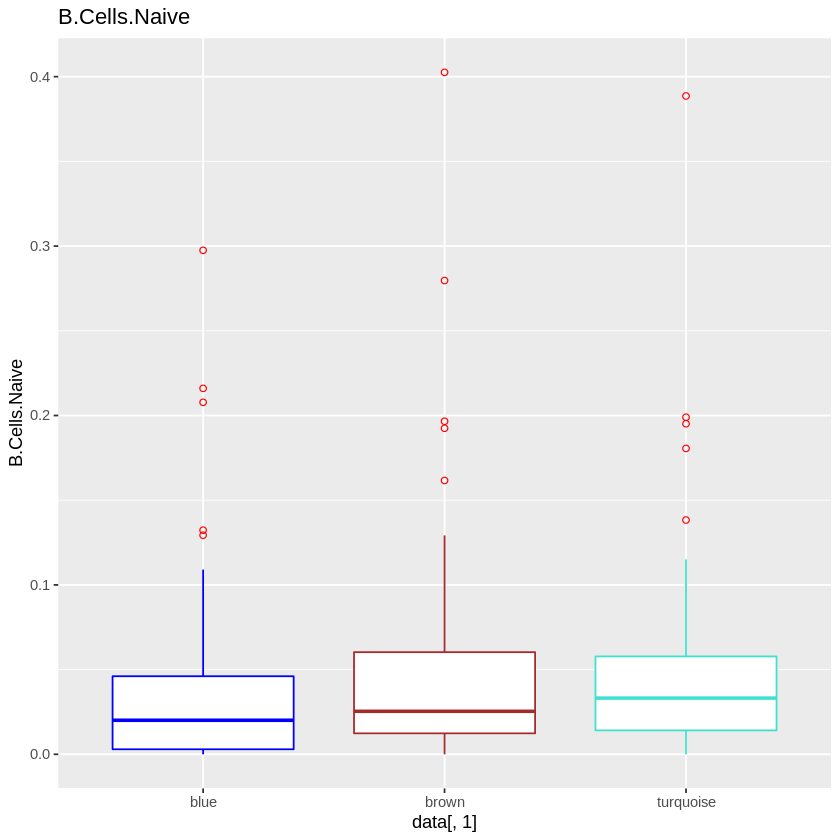

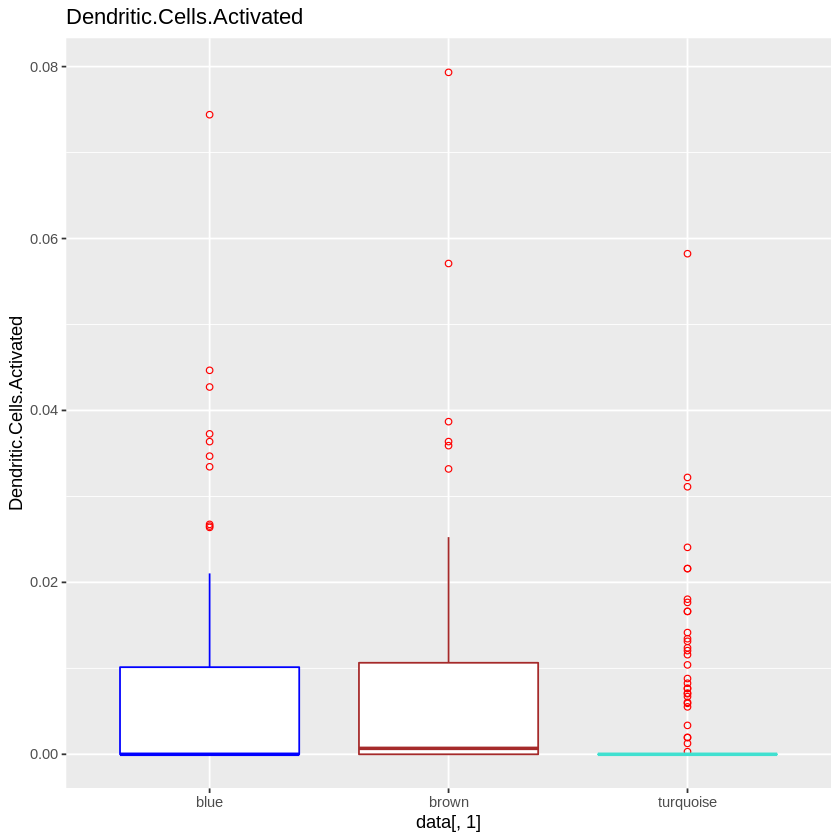

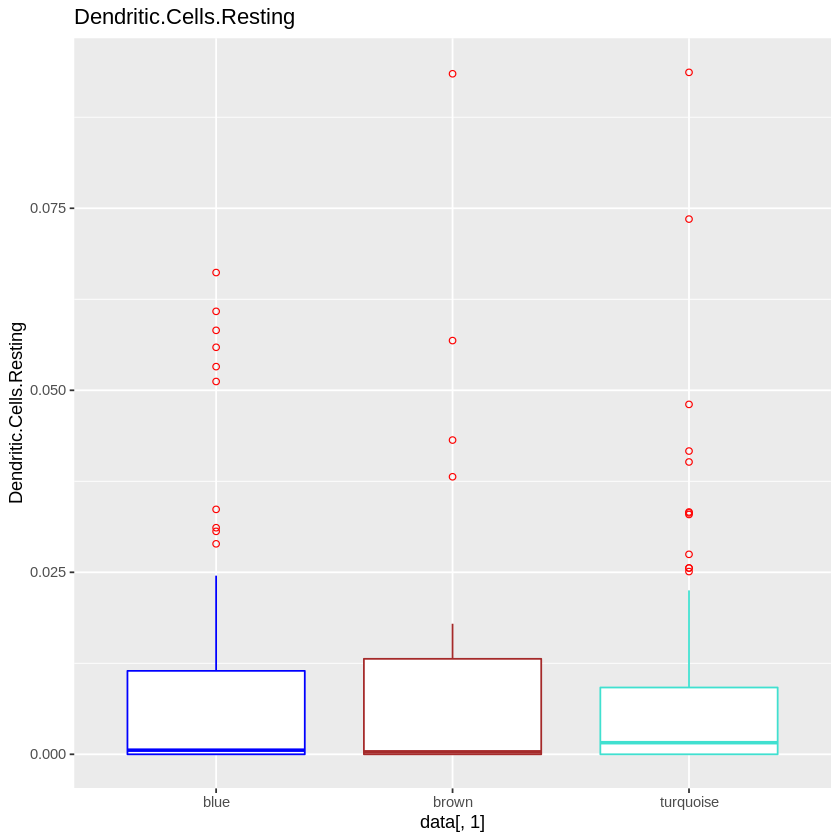

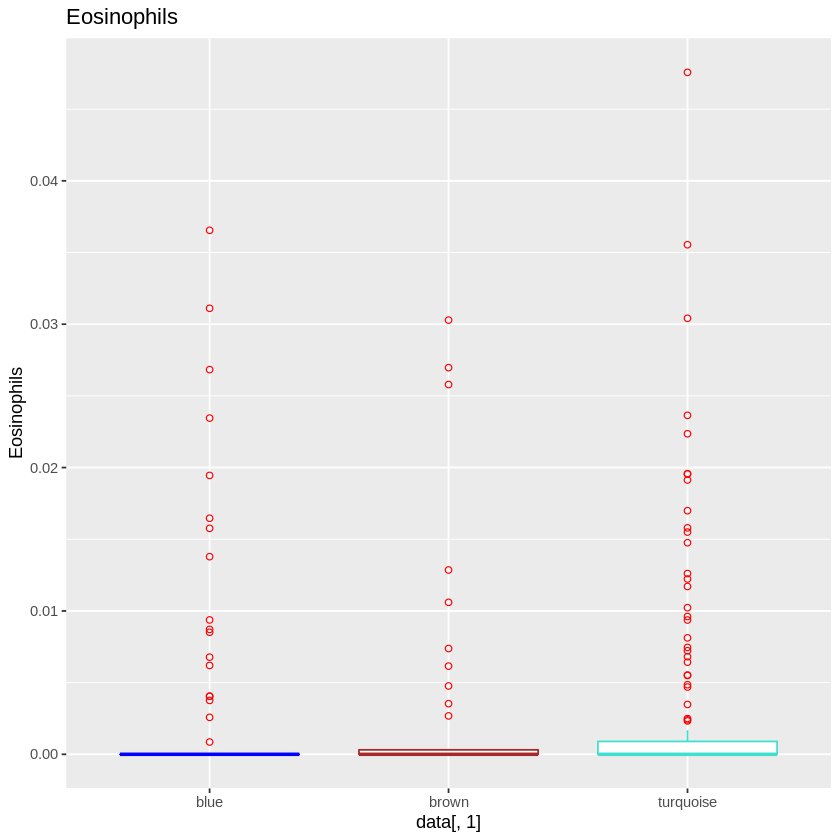

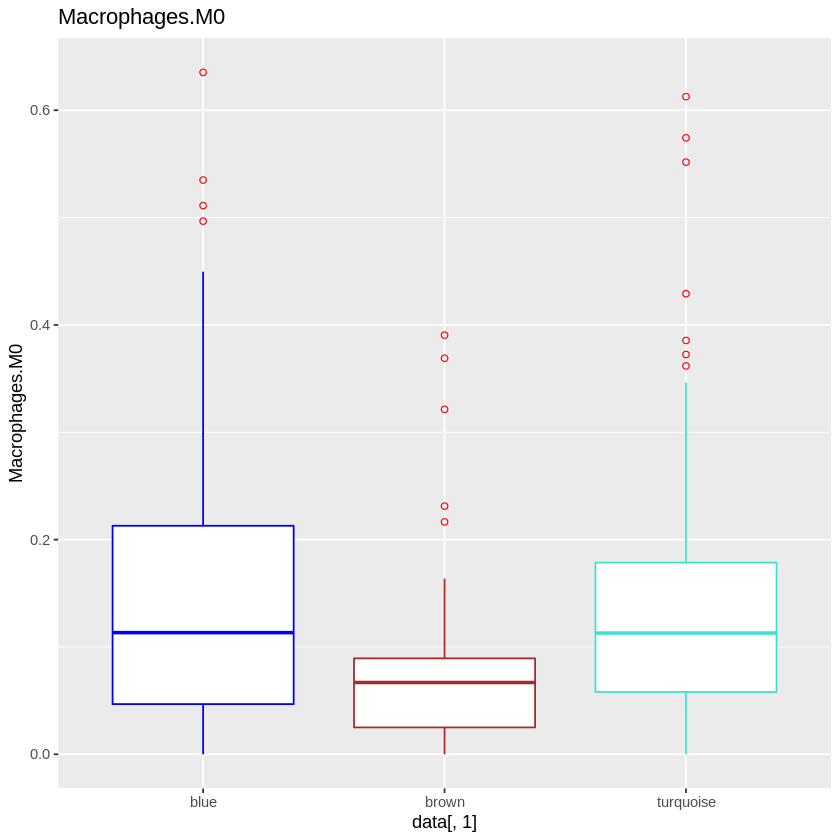

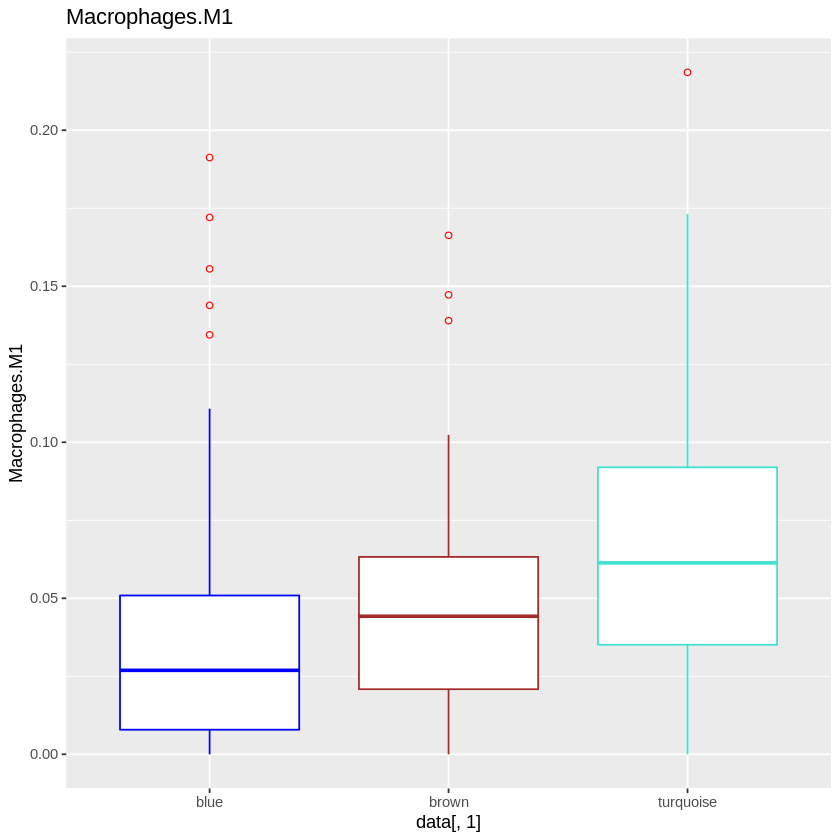

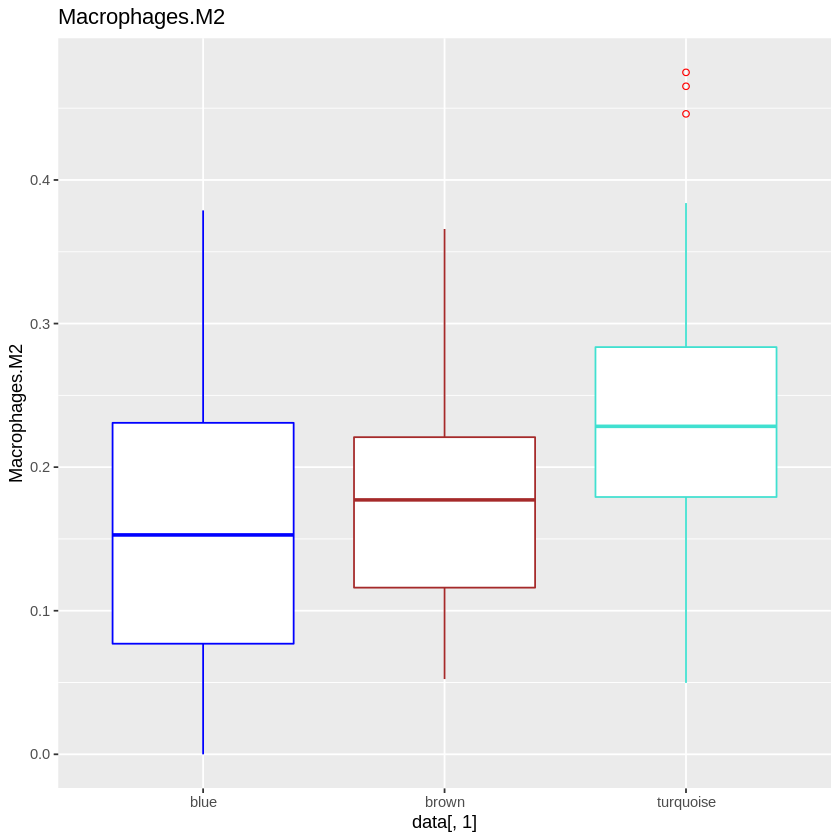

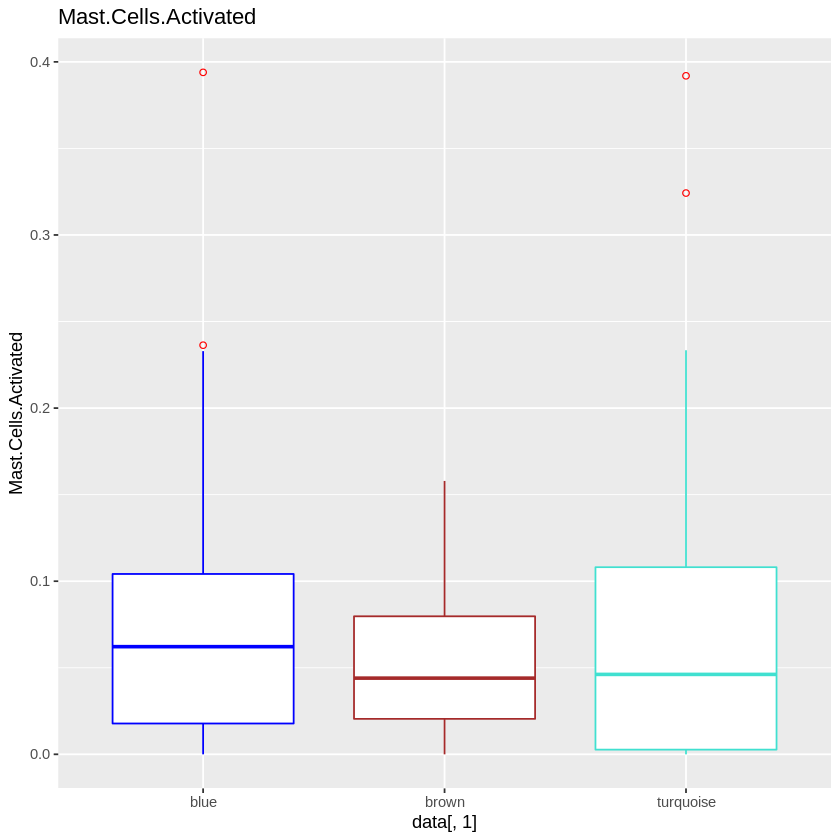

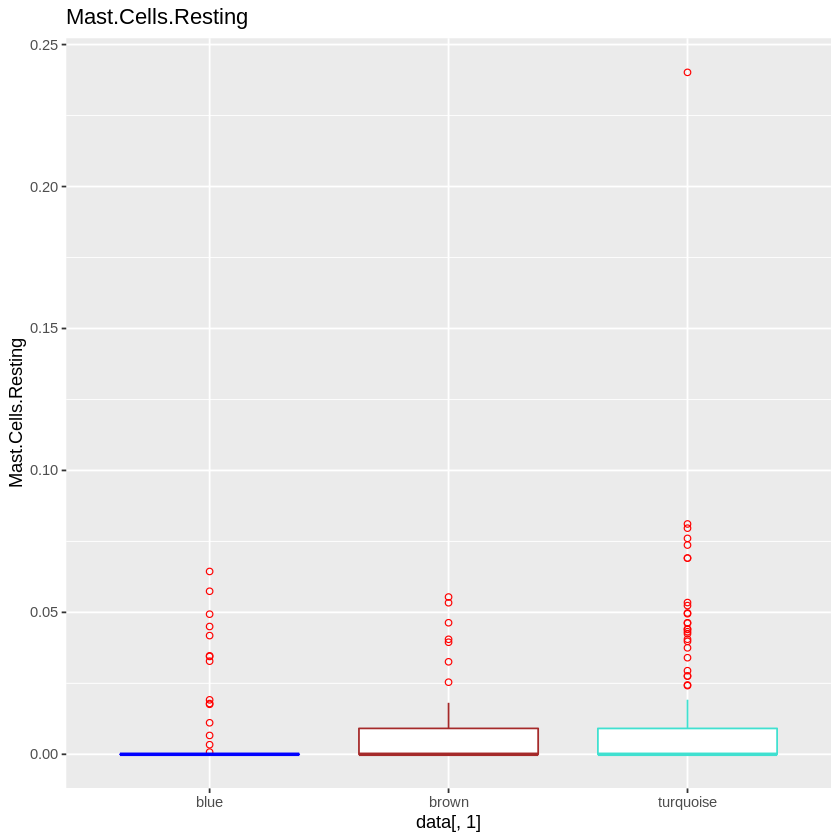

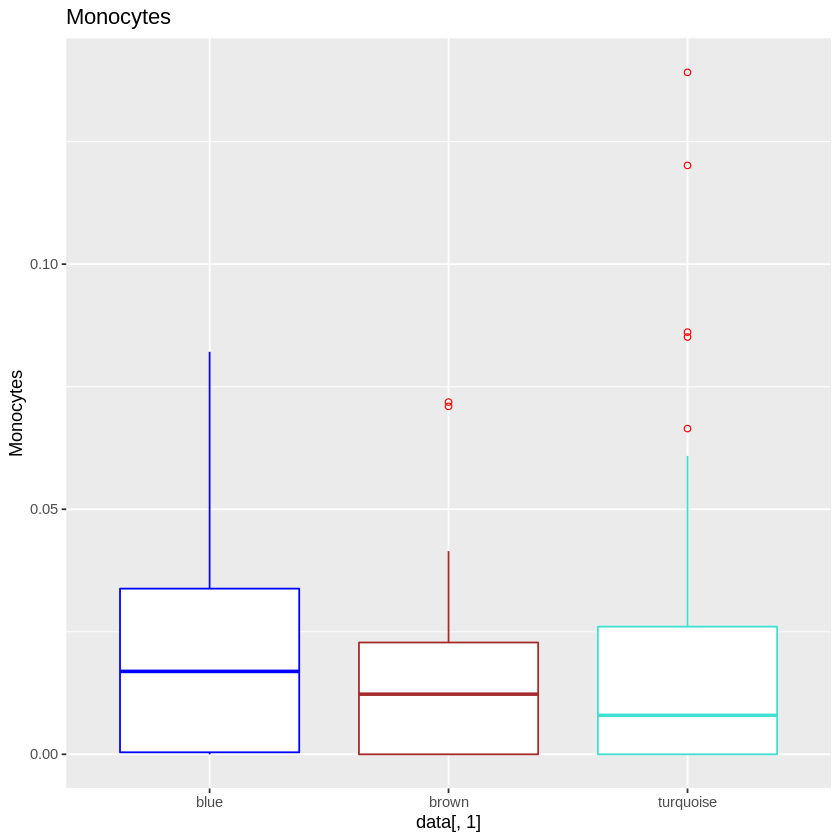

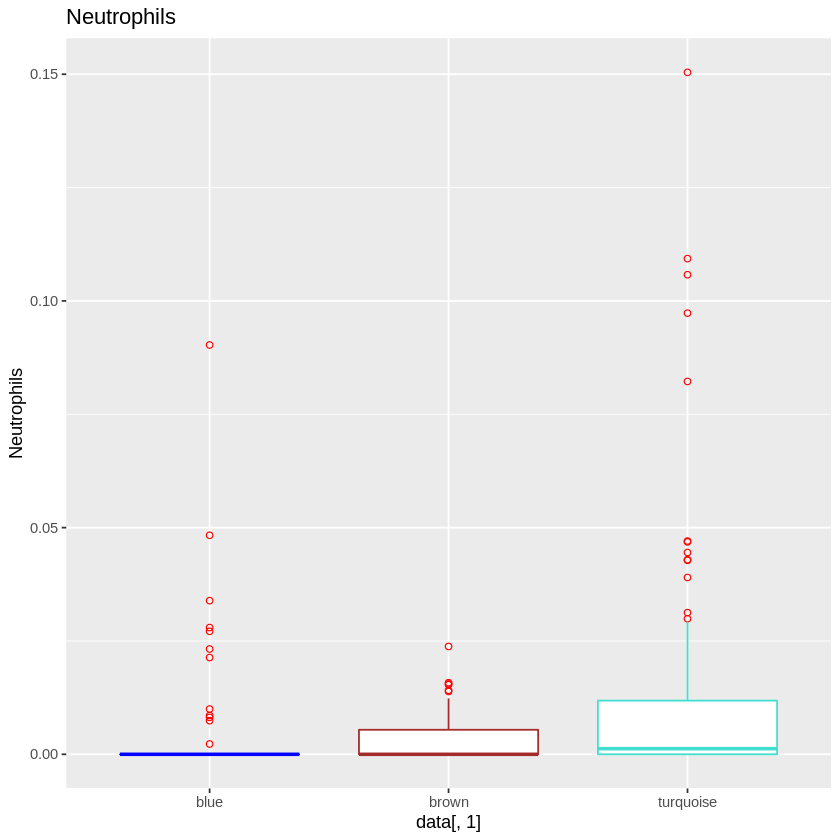

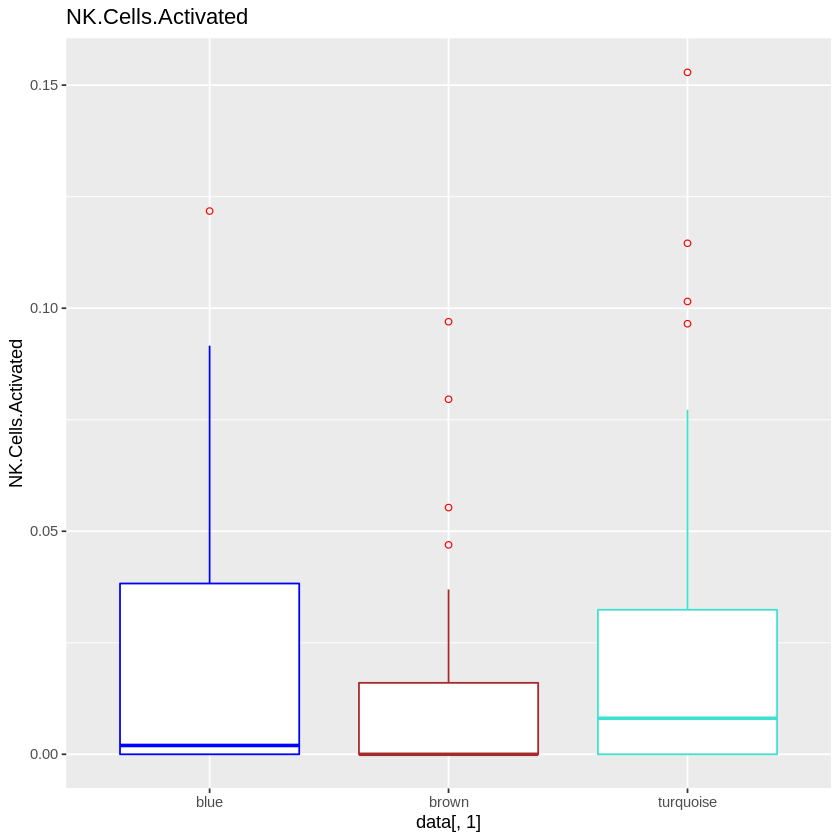

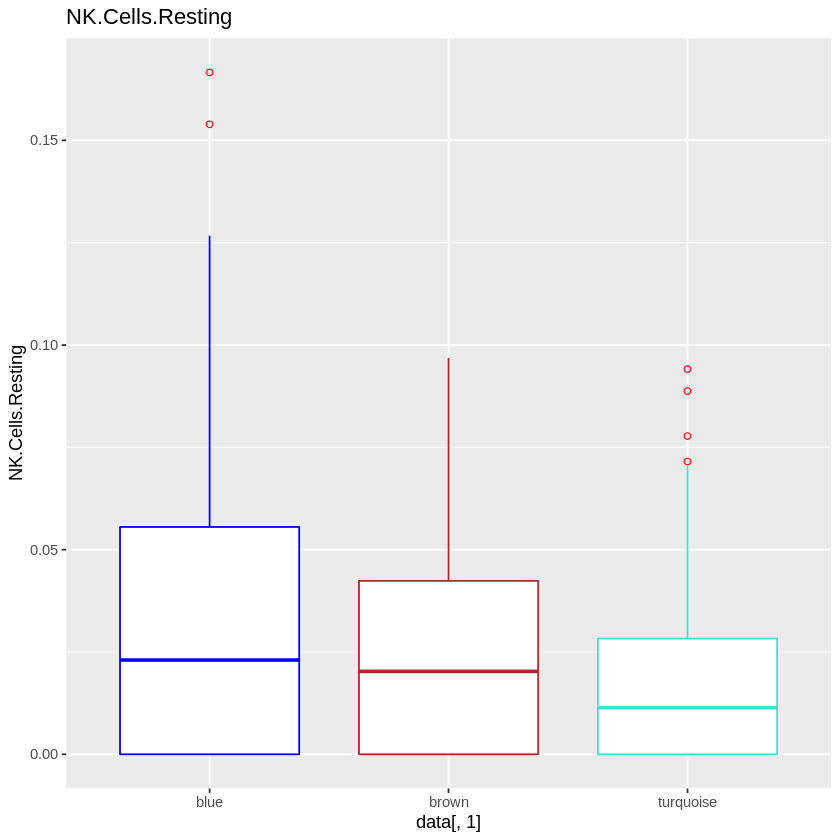

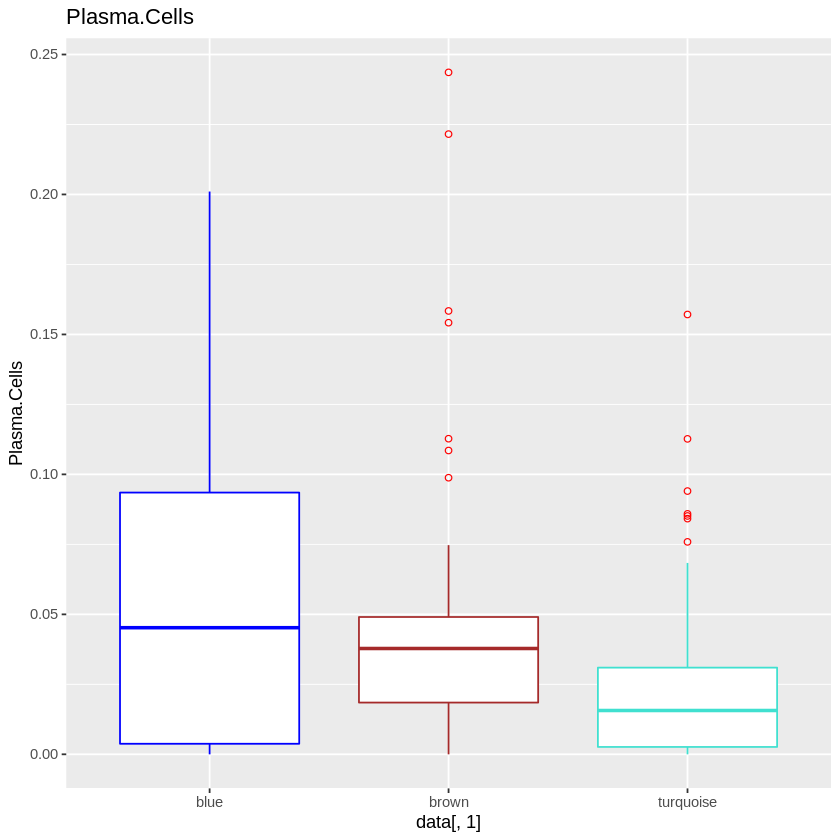

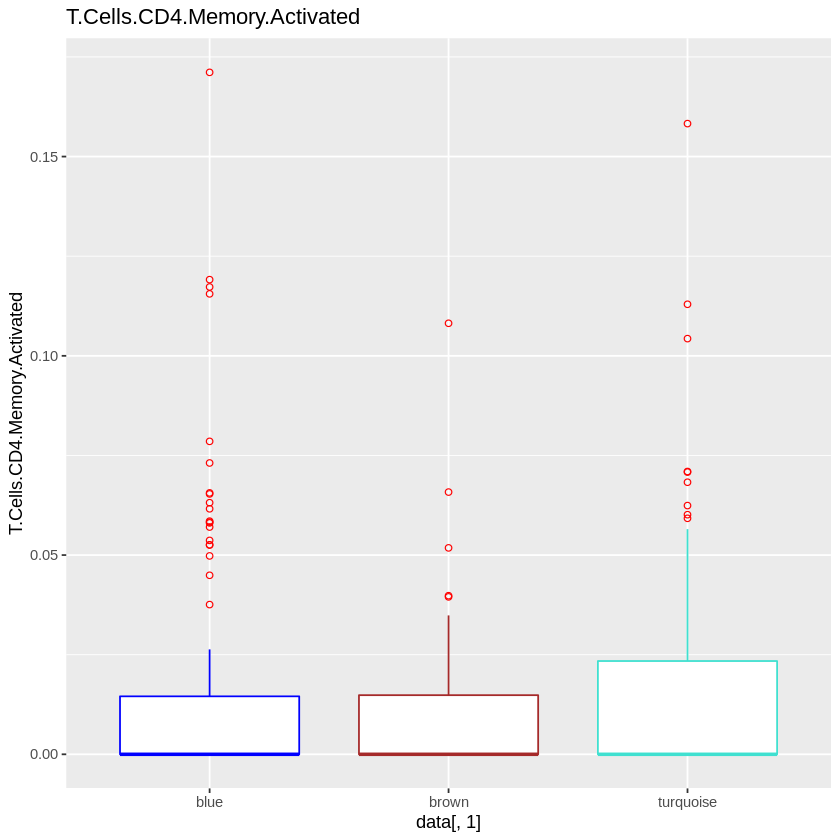

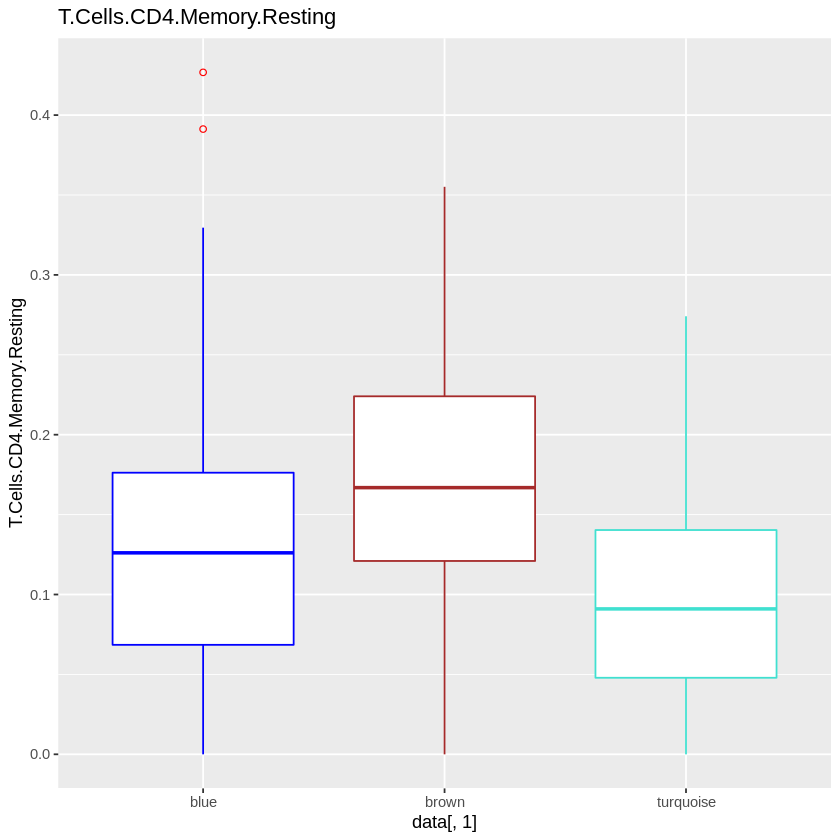

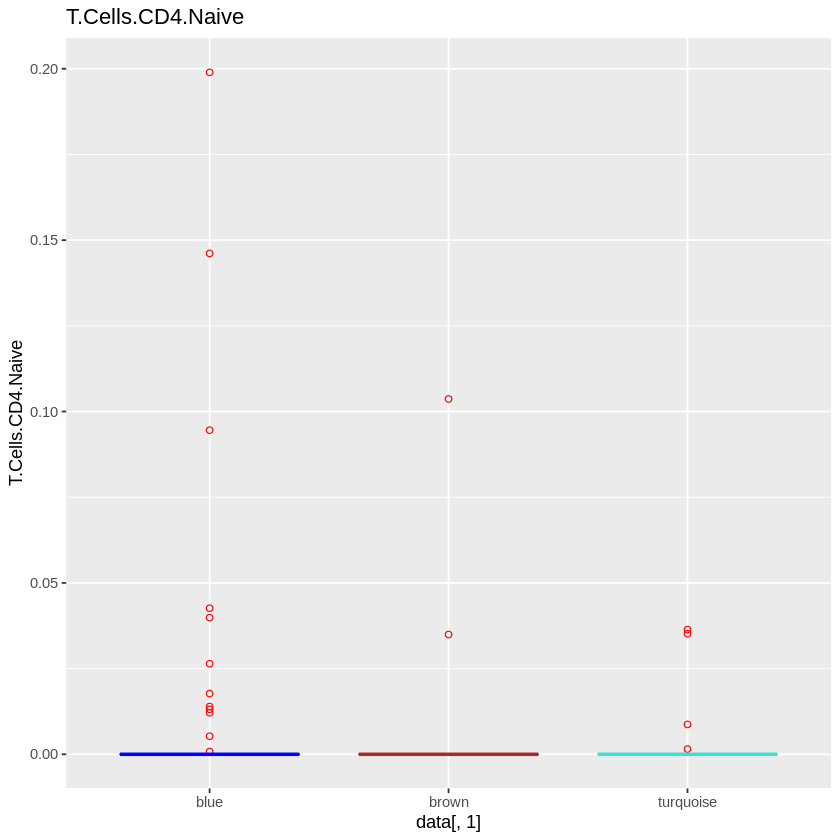

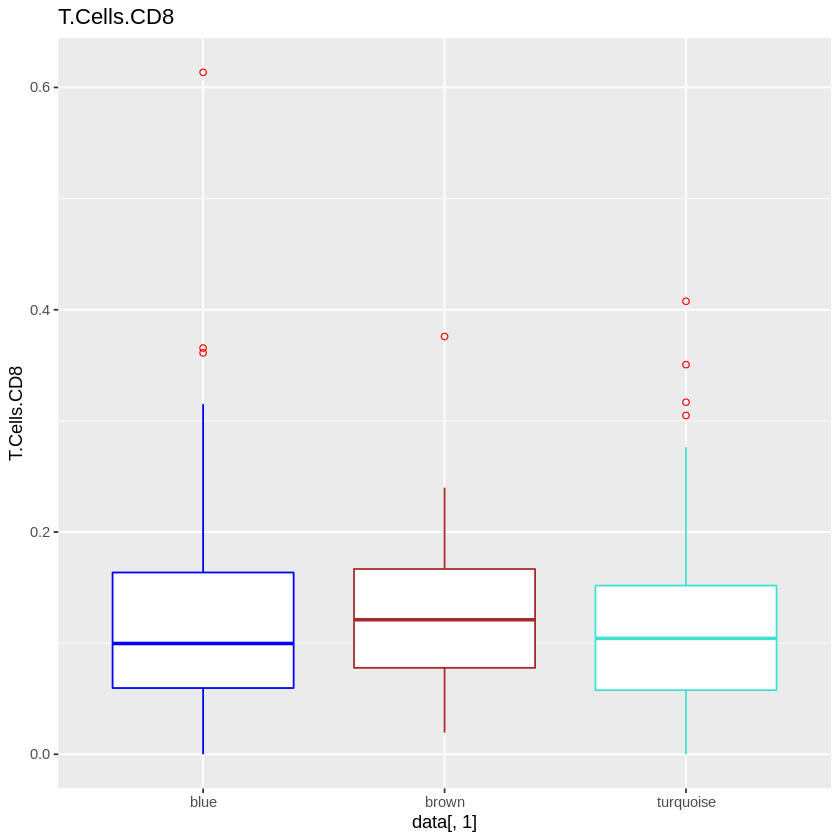

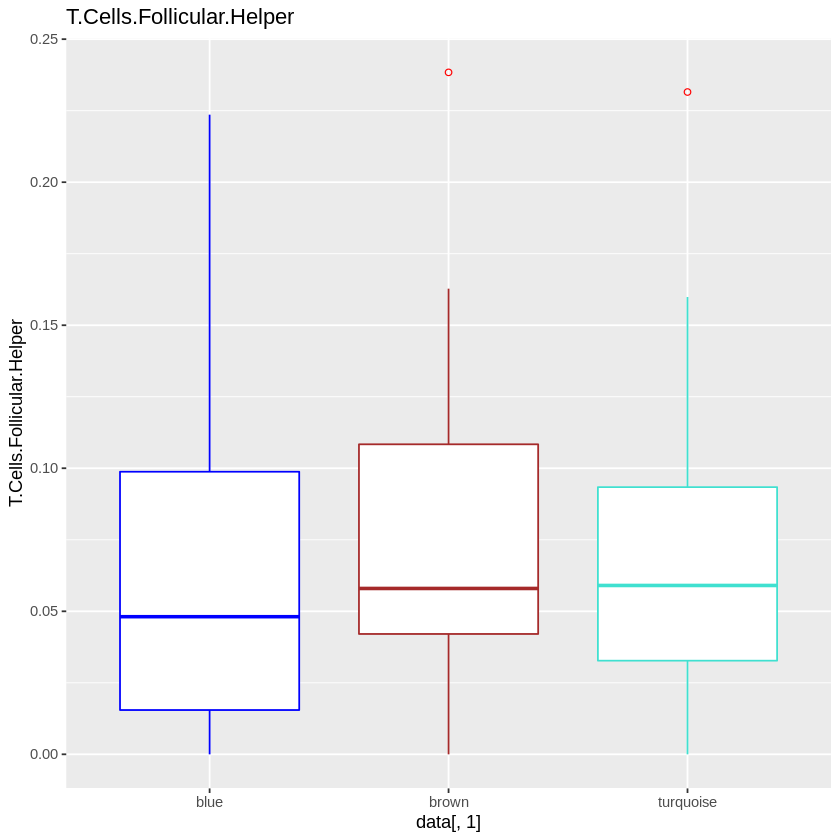

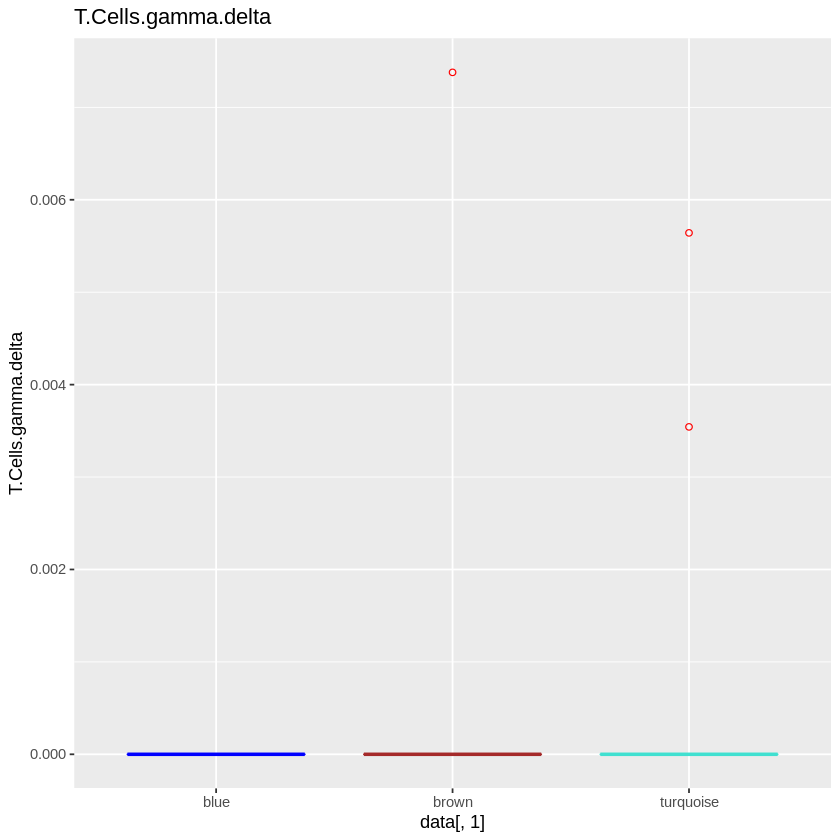

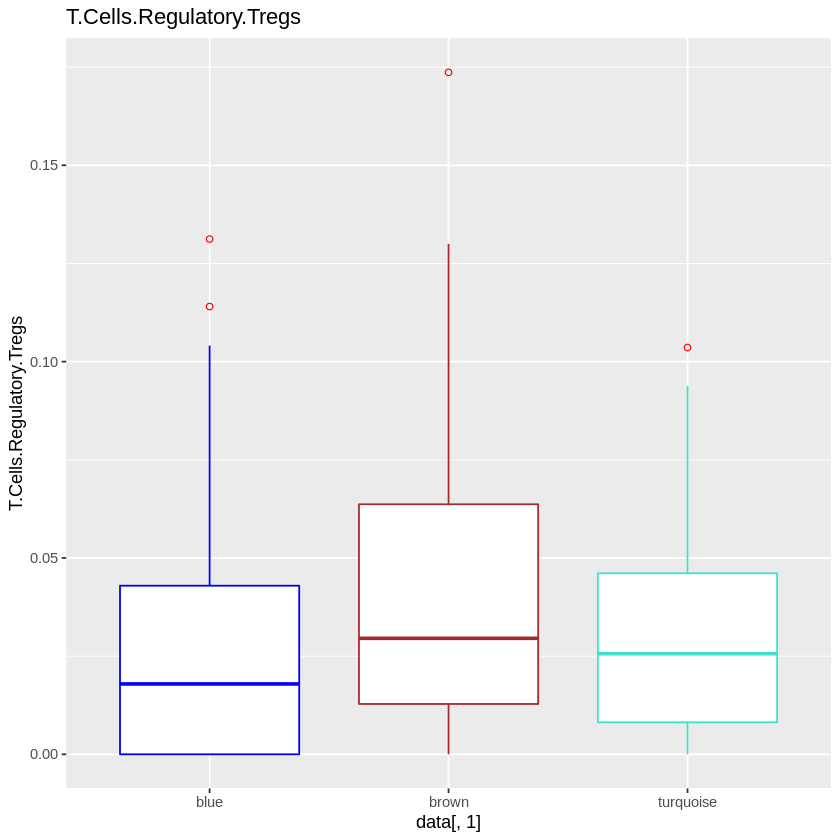

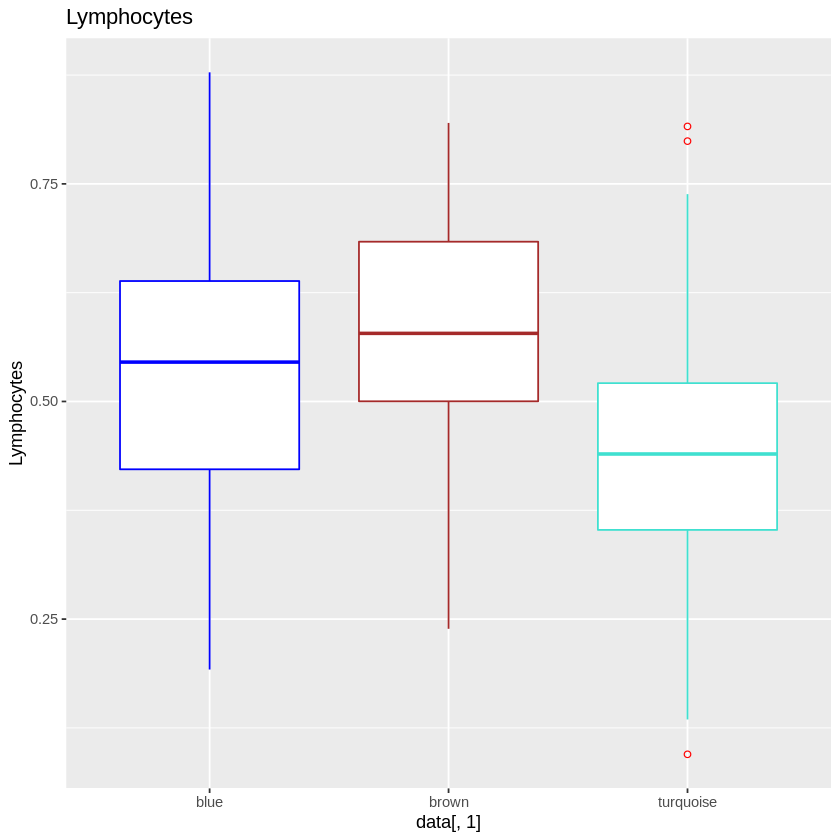

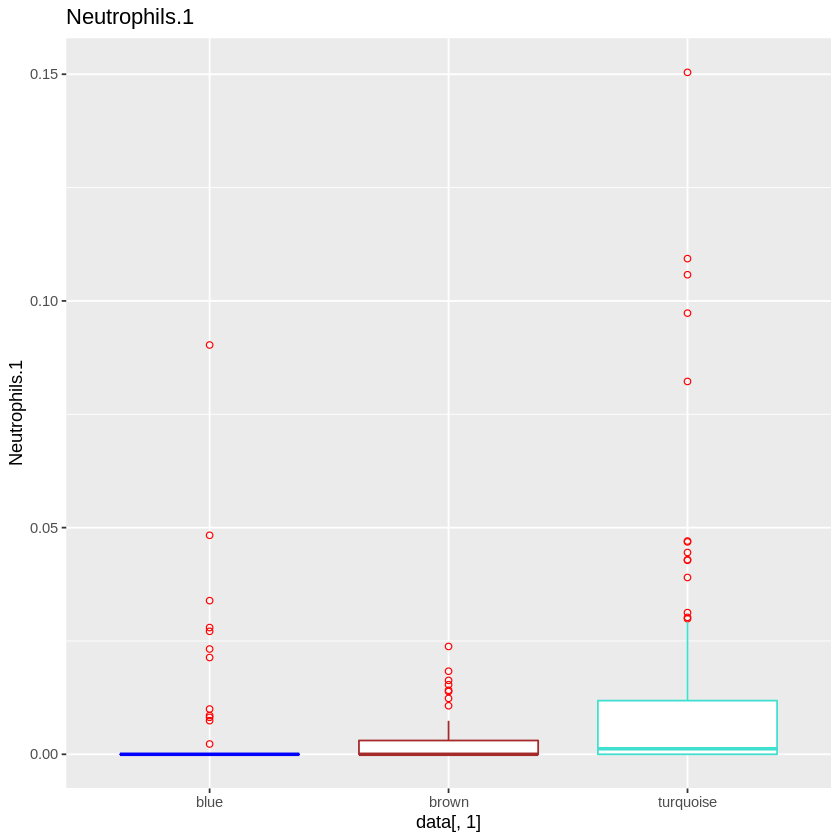

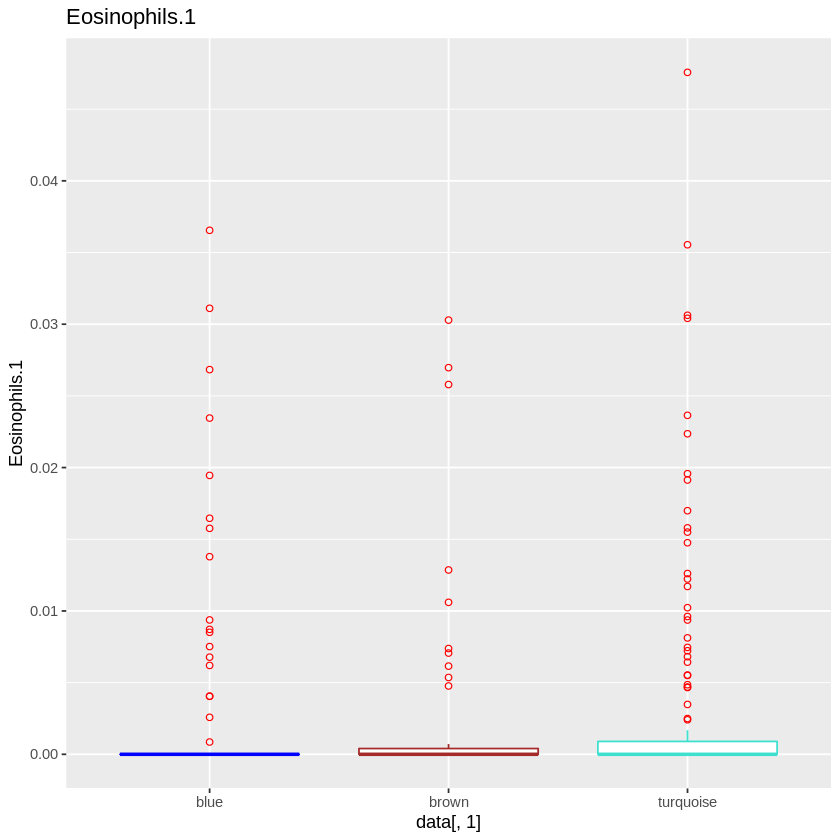

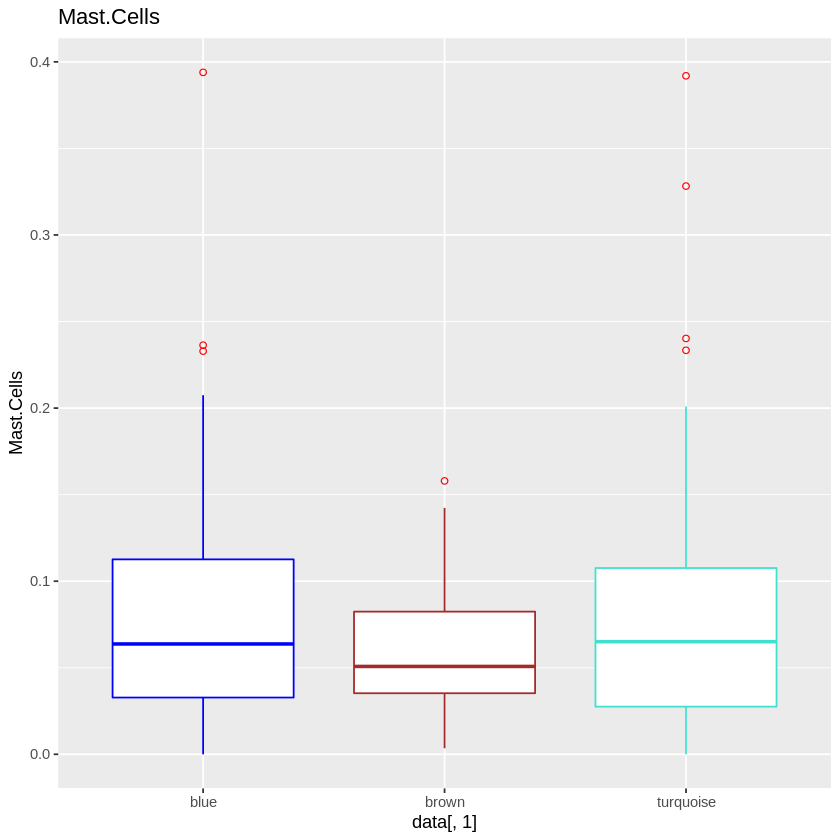

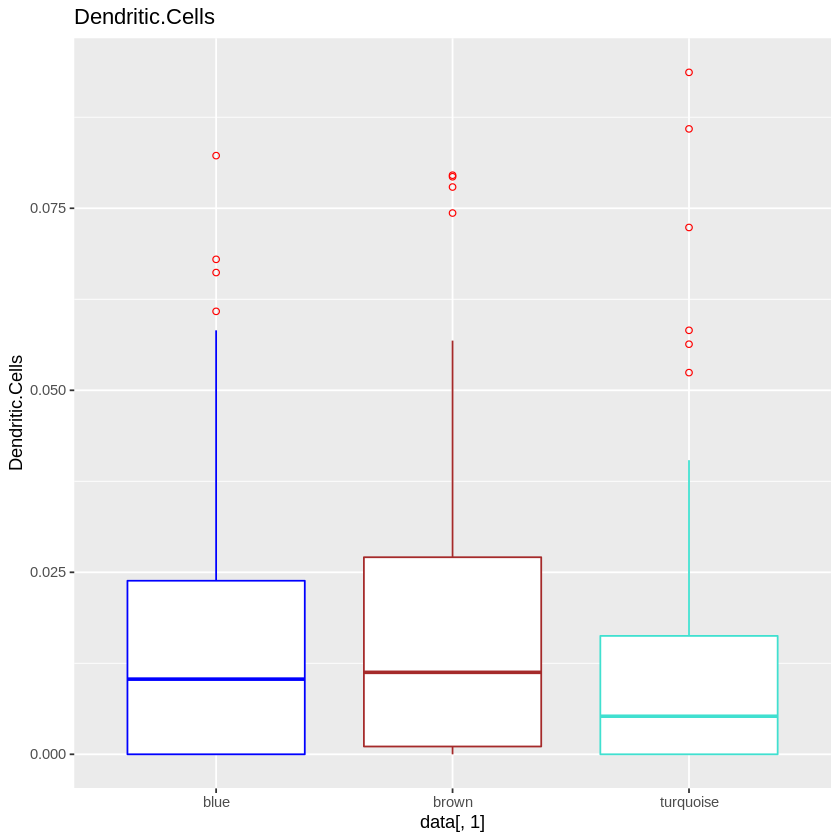

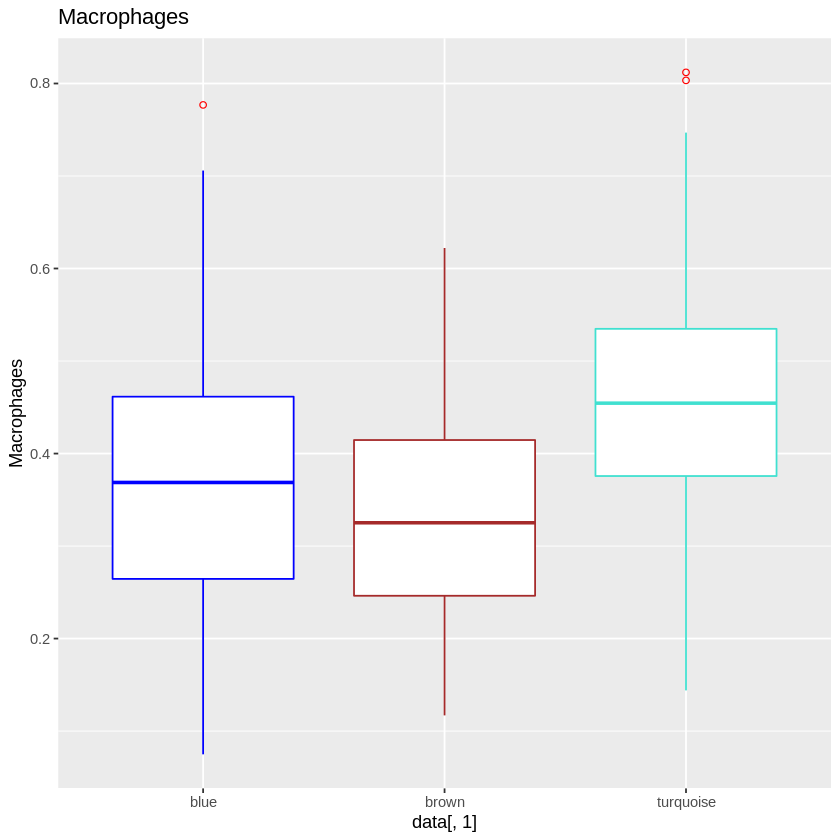

In [4]:
#### 5.GGplot_COAD_Immune_Landscape_of_Cancer.R
### 1)Merge table
#Cluster.df
#COAD_Immune_Characteristics$TCGA.Participant.Barcode
COAD_Immune_Characteristics$barcode <- gsub("-",".",COAD_Immune_Characteristics$TCGA.Participant.Barcode)
#Cluster.df$rownames
Cluster.df$barcode <- substr(Cluster.df$rownames, start = 1, stop = 12)
Plot.df.Immune.Char <- dplyr::left_join(Cluster.df, COAD_Immune_Characteristics, by = "barcode")
#### Remove yellow sample from the data set
Plot.df.Immune.Char <- Plot.df.Immune.Char[Plot.df.Immune.Char$dynamicColors != "yellow",]

library(ggplot2)
for(i in colnames(Plot.df.Immune.Char)){
  Plot.df.sub <- Plot.df.Immune.Char[,c("dynamicColors",i)]
  ##### 1.Discrete variable #####
  if (is.factor(Plot.df.sub[,i])) {
    ######## 1.Discrete variable
    # Remove NA value
    data=subset(Plot.df.sub, !is.na(Plot.df.sub[,i]))
    p <- ggplot(data, aes(x = dynamicColors, fill = data[,i])) + 
      geom_bar(position = "fill") + theme_minimal()+ scale_fill_discrete(name =i)+
      labs(title =i)
    print(p)
  } else if (is.numeric(Plot.df.sub[,i])) {
    ######## 2.Continuous variable
    # Remove NA value
    data=subset(Plot.df.sub, !is.na(Plot.df.sub[,i]))
    p2 <-ggplot(data,aes(x=data[,1], y=data[,2]),color=dynamicColors)  + 
      geom_boxplot(outlier.colour = "red",outlier.shape = 1,colour = c("blue","brown","turquoise")) + 
      labs(title =i, y = i)
    print(p2)
  }  else if (is.integer(Plot.df.sub[,i])) {
    ######## 2.Continuous variable
    # Remove NA value
    data=subset(Plot.df.sub, !is.na(Plot.df.sub[,i]))
    p2 <-ggplot(data,aes(x=data[,1], y=data[,2]))  + 
      geom_boxplot(outlier.colour = "red",outlier.shape = 1,colour = c("blue","brown","turquoise")) + 
      labs(title =i, y = i)
    print(p2)
  } else {
    #### 3.If something wrong
    print(paste0("Some thing wrong with---",i))
  } 
}

